 <div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <font color='green'> <b><u>КОММЕНТАРИЙ ТИМЛИДА</u></b><br>
Здравствуй Игорь!<br>
Это Николай. И нам повезло - мы делаем интереснейший проект!<br>
Далее, я постарюсь прокомментировать сделанные шаги.<br>
Вперёд!
        
Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Всё хорошо.</p>
</div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Обрати внимание, есть потенциал</p>
</div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Нужно ещё раз глянуть</p>
</div>
        
<font color='green'>Как и всегда в спринтах - ставлю своей целью максимально помочь. Поэтому, все мои комментарии - это только способ передать свой опыт для помощи в твоих достижениях.

**Тема исследования: "Предсказание температуры стали".**

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

**Описание этапа обработки:**

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

**Описание данных:**

Данные состоят из файлов, полученных из разных источников:

- `data_arc_new.csv` — данные об электродах;
- `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time_new.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas_new.csv` — данные о продувке сплава газом;
- `data_temp_new.csv` — результаты измерения температуры;
- `data_wire_new.csv` — данные о проволочных материалах (объём);
- `data_wire_time_new.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>ок, это хороший тон - дать описание проблематики.</p>
</div>

# Первичный анализ данных, план проекта:

## Импорт библиотек:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    file_paths = [
    'D://Education//Module_16 (!Final Project)//data_arc_new.csv',
    'D://Education//Module_16 (!Final Project)//data_bulk_new.csv',
    'D://Education//Module_16 (!Final Project)//data_bulk_time_new.csv',
    'D://Education//Module_16 (!Final Project)//data_gas_new.csv',
    'D://Education//Module_16 (!Final Project)//data_temp_new.csv',
    'D://Education//Module_16 (!Final Project)//data_wire_new.csv',
    'D://Education//Module_16 (!Final Project)//data_wire_time_new.csv'
    ]
    data_frames = []
    for file_path in file_paths:
        data_frame = pd.read_csv(file_path)
        data_frames.append(data_frame)
    data_arc, data_bulk, data_bulk_time, data_gas, data_temp, data_wire, data_wire_time = data_frames

except:
    data_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
    data_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
    data_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
    data_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
    data_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
    data_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
    data_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')

In [3]:
state = 220523

## Изучение данных:

### Датафрейм "data_arc":

#### Общий вид датафрейма:

In [4]:
display(data_arc.head())

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


Данный датафрейм содержит данные об электродах, о времени начала и конца нагрева, об активной и реактивной мощности.

#### Основная информация датафрейма:

In [5]:
print(data_arc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB
None


**Столбцы:**
- **"key"** - содержит информацию о номере партии, имеет тип данных "int64";
- **"Начало нагрева дугой" и "Конец нагрева дугой"** - содержат информацию о дате и времени начала процедуры, имеют формат "object" *(необходимо рассмотреть вопрос об изменении типов данных в указанных столбцах)*.  
  
Нагревание электрода дугой является важной частью сварочного процесса и влияет на его эффективность и качество сварки. При сварке с использованием дуги, электрод подвергается высокой температуре, которая вызывает плавление электрода и образование сварочной дуги между электродом и свариваемым материалом.  
  
Процесс нагревания электрода дугой происходит следующим образом:  
  
1. Зажигание дуги: Когда электрод приближается к свариваемому материалу, между ними возникает электрическая разрядка, известная как сварочная дуга. При этом выделяется значительное количество тепла, что приводит к нагреванию электрода.

2. Поддержание дуги: После зажигания дуги электрод поддерживает постоянный ток, создавая стабильную сварочную дугу. Во время поддержания дуги, электрод нагревается дальше под воздействием высокой температуры.

3. Плавление электрода: Под воздействием высокой температуры, материал электрода начинает плавиться. Плавящийся металл создает сварочную ванну и служит источником наплавляемого материала для создания сварочного шва.

Нагревание электрода дугой является нормальным явлением при сварке. Однако, для поддержания электрода в рабочем состоянии и предотвращения его перегрева, могут использоваться специальные техники, такие как регулировка сварочного тока, выбор оптимального типа электрода, применение охлаждающих систем и т. д. Это помогает обеспечить эффективность и качество сварочного процесса.  
- **"Активная мощность" и "Реактивная мощность"** - термины относятся к электрической сети и используются для описания энергетических характеристик электрических устройств и потребления энергии.  
  
Активная мощность (P) измеряется в ваттах (Вт) и представляет собой фактическую мощность, которая реально потребляется или производится устройством или системой. Она является мощностью, которая выполняет полезную работу, например, приводит в движение электрические двигатели или освещает лампы.  
  
Реактивная мощность (Q) измеряется в варах (ВАР) и представляет собой мощность, которая переходит между источником энергии и нагрузкой, но не выполняет полезную работу. Она связана с реактивным компонентом тока, который несет энергию в магнитных или электрических полях в системе. Реактивная мощность обычно связана с индуктивными и емкостными элементами в электрической цепи, такими как индуктивности и конденсаторы.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>👍

In [6]:
display(data_arc.describe())

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


#### Кол-во строк, столбцов датафрейма:

In [7]:
print(data_arc.shape)

(14876, 5)


Датафрейм содержит 14 876 строк и 5 столбцов.

#### Количество пропусков в данных:

In [8]:
print(data_arc.isna().sum())

key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64


Пропусков в датафрейме не выявлено.

#### Количество дубликатов в данных:

In [9]:
print(data_arc.duplicated().sum())

0


Явных дубликатов в датафрейме не выявлено.

#### Гистограммы по столбцам датафрейма:

**Столбец "key" содержит сведения о 3241 партии:**

In [10]:
print(data_arc['key'].unique())

[   1    2    3 ... 3239 3240 3241]


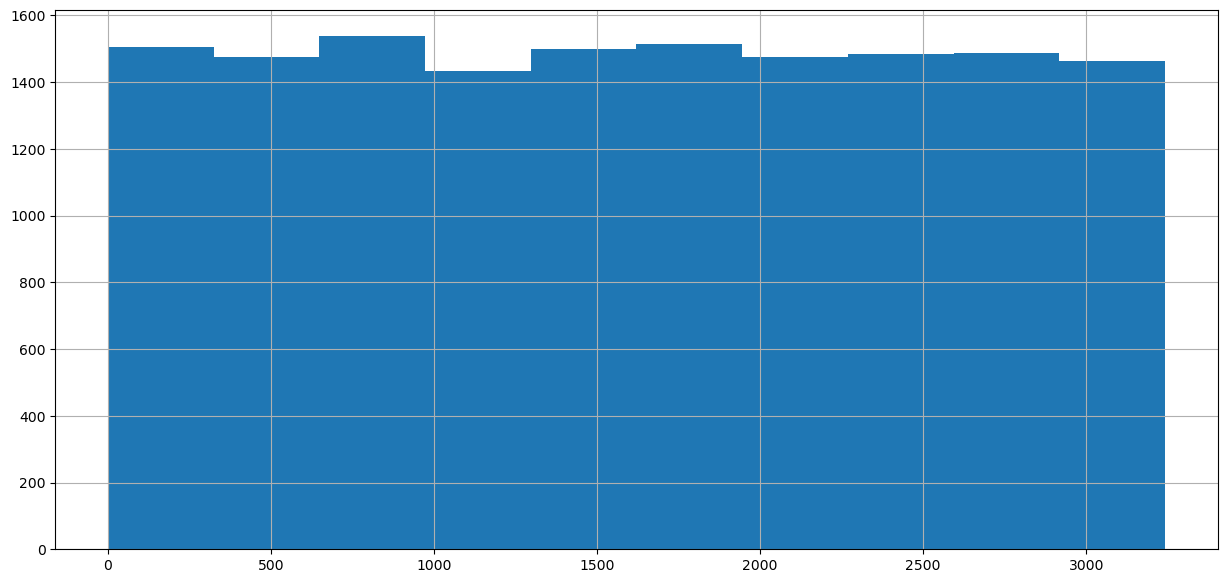

In [11]:
data_arc['key'].hist(figsize=(15, 7));

**Столбец "Активная мощность" содержит сведения о мощности в ваттах в диапазоне от "0.22312" до "1.463773" ватт:**

In [12]:
print('Минимальная мощность в ваттах:', data_arc['Активная мощность'].min())
print('Максимальная мощность в ваттах:', data_arc['Активная мощность'].max())

Минимальная мощность в ваттах: 0.22312
Максимальная мощность в ваттах: 1.463773


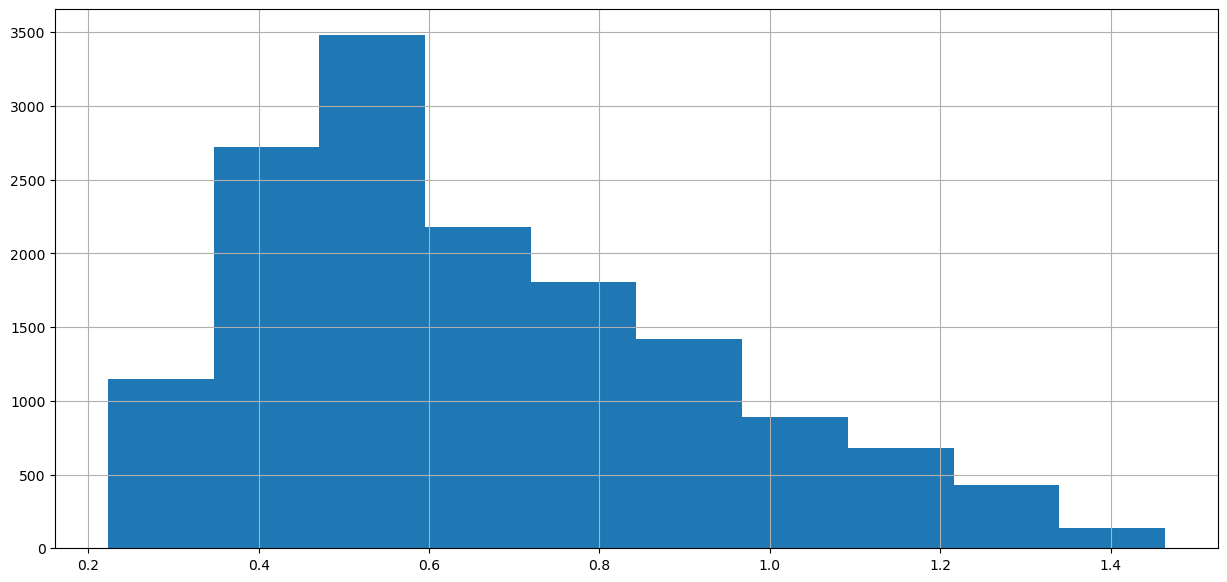

In [13]:
data_arc['Активная мощность'].hist(figsize=(15, 7));

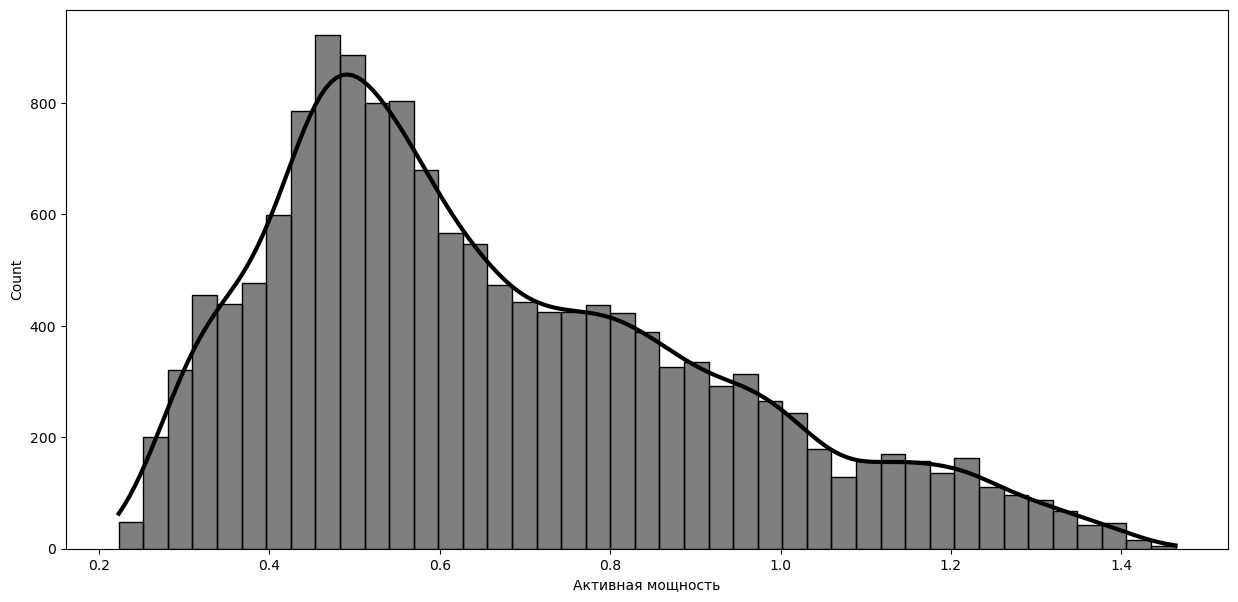

In [14]:
plt.figure(figsize=(15,7))
sns.histplot(data_arc['Активная мощность'], color=['black'], kde=True, line_kws={'linewidth': 3})
plt.show()

**Столбец "Реактивная мощность" содержит сведения о мощности в варах в диапазоне от "-715.479924" до "1.270284" вар:**

In [15]:
print('Минимальная мощность в варах:', data_arc['Реактивная мощность'].min())
print('Максимальная мощность в варах:', data_arc['Реактивная мощность'].max())

Минимальная мощность в варах: -715.479924
Максимальная мощность в варах: 1.270284


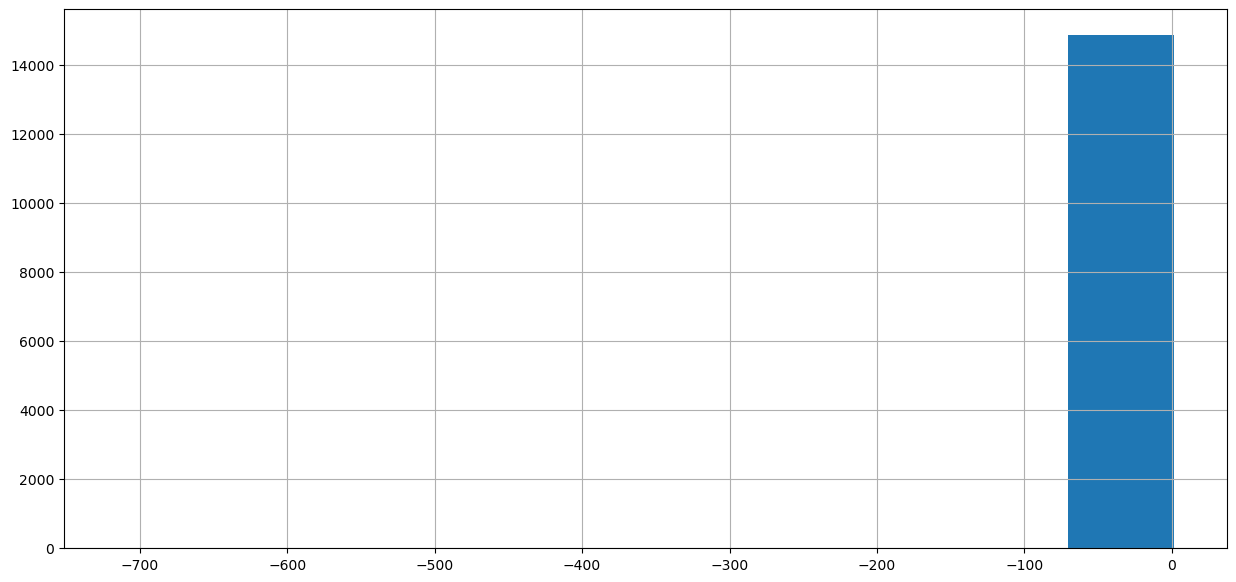

In [16]:
data_arc['Реактивная мощность'].hist(figsize=(15, 7));

**Основной объем показателей о реактивной мощности находится в диапазоне значений от "0" до "1", рассмотрим остальные значения:**

In [17]:
print(data_arc[data_arc['Реактивная мощность'] < 0].value_counts())

key   Начало нагрева дугой  Конец нагрева дугой  Активная мощность  Реактивная мощность
2116  2019-07-28 02:22:08   2019-07-28 02:23:57  0.705344           -715.479924            1
dtype: int64


Указанное значение предположительно является "аномалией", т.к. из 14 876 строк только один показатель имеет значение меньше нуля.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>есть такое)

**Рассмотрим распеределение значений без "аномального значения":**

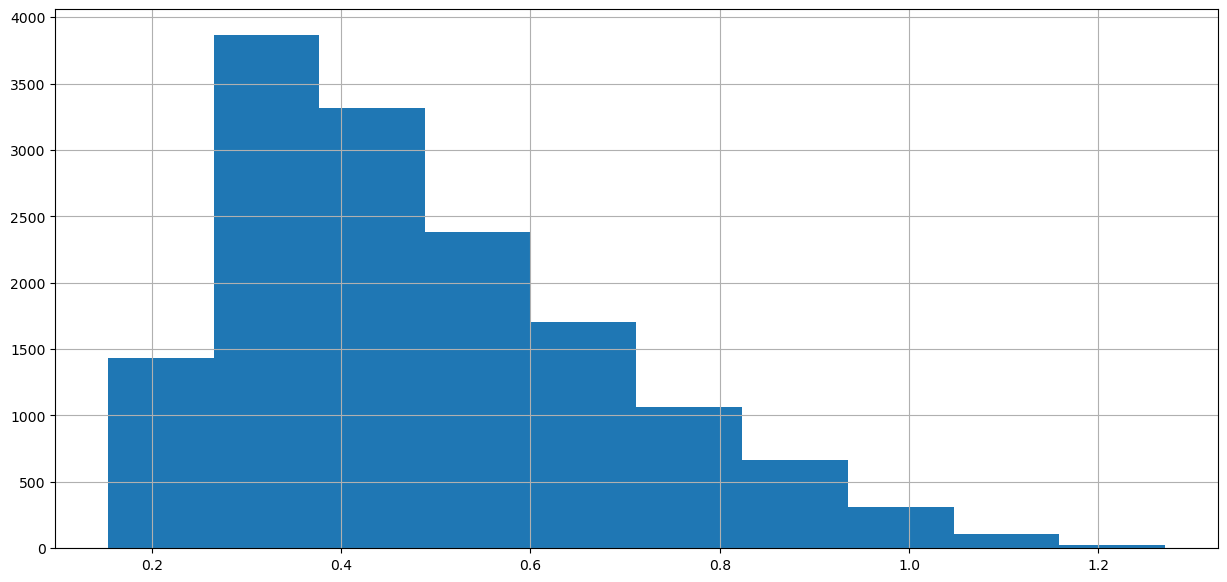

In [18]:
data_arc_temp = data_arc[data_arc['Реактивная мощность'] > 0]
data_arc_temp['Реактивная мощность'].hist(figsize=(15, 7));

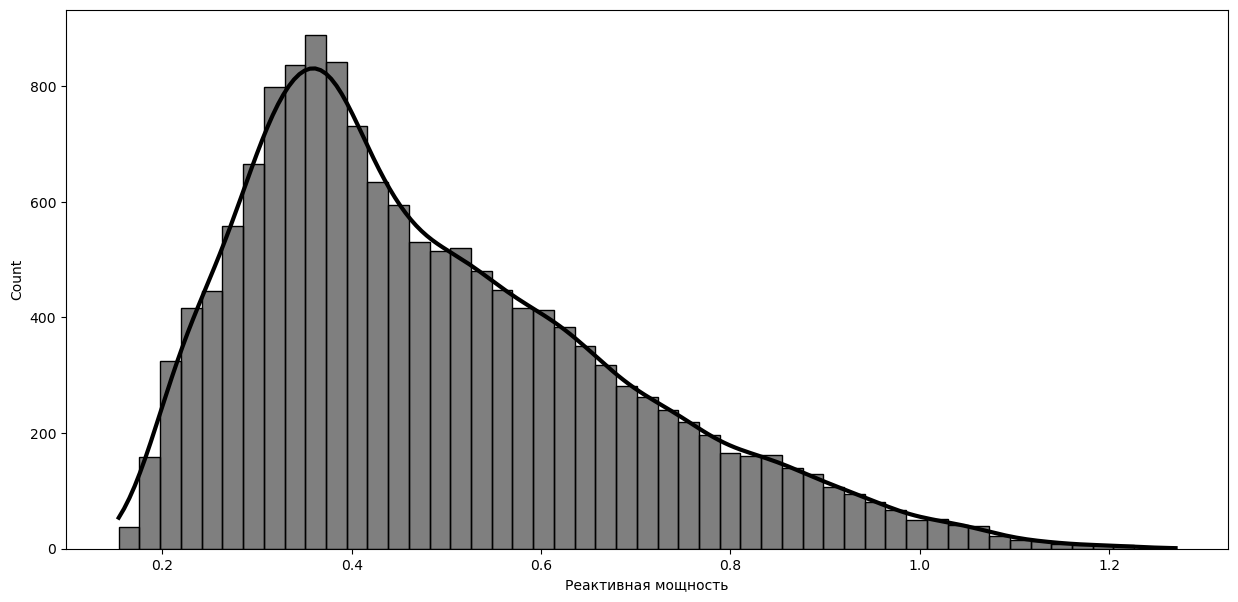

In [19]:
plt.figure(figsize=(15,7))
sns.histplot(data_arc_temp['Реактивная мощность'], color=['black'], kde=True, line_kws={'linewidth': 3})
plt.show()

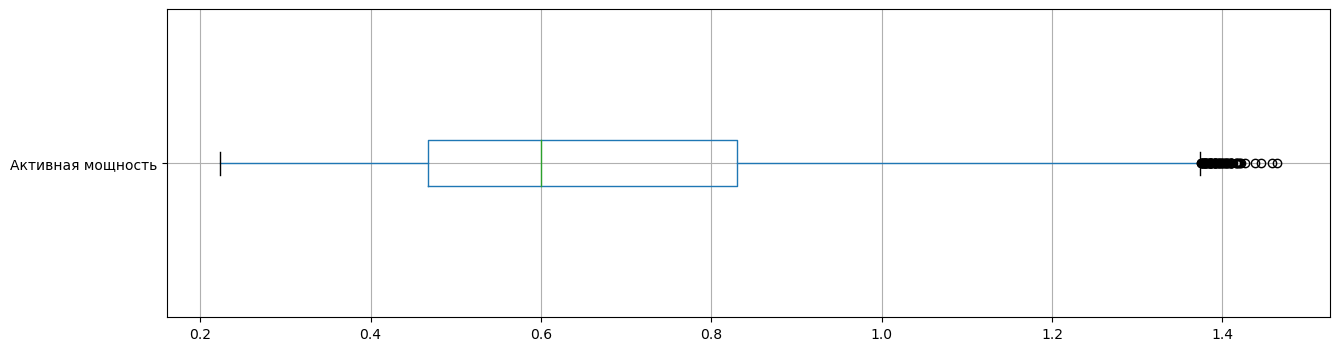

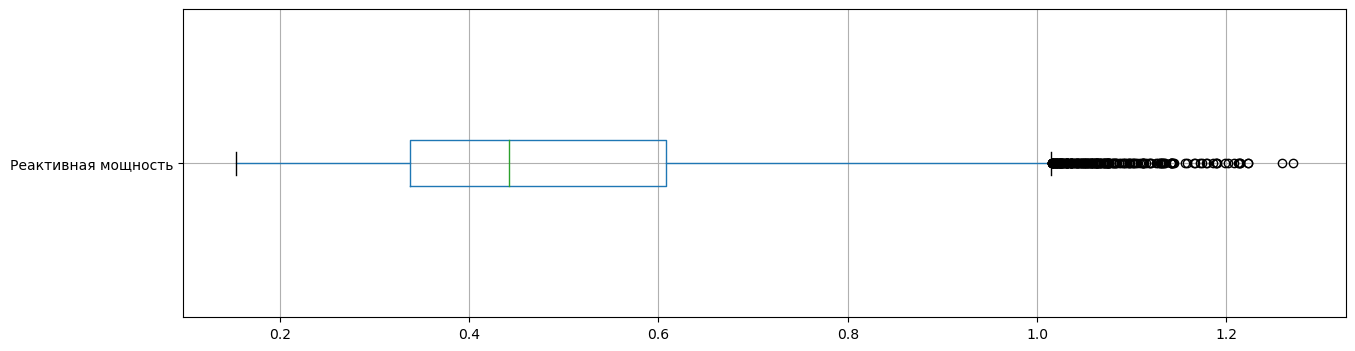

In [20]:
plt.figure(figsize=(15, 4))
data_arc.boxplot('Активная мощность', vert=False)
plt.show()

plt.figure(figsize=(15, 4))
data_arc_temp.boxplot('Реактивная мощность', vert=False)
plt.show()

In [21]:
del data_arc_temp

**Из полученной визуализации столбцов "Активная мощность" и "Реактивная мощность" видно:**
- Данные имеют вид "нормального распределения";
- Некоторые данные уходят от "нормального распределения".

### Датафрейм "data_bulk":

#### Общий вид датафрейма:

In [22]:
display(data_bulk.head())

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


Данный датафрейм содержит данные об объеме подачи сыпучих материалов.

#### Основная информация датафрейма:

In [23]:
print(data_bulk.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB
None


**Столбцы:**
- **"key"** - содержит информацию о номере партии, имеет тип данных "int64";
- **"Bulk 1" - "Bulk 15"** - содержат информацию добавлении сыпучих материалов.

In [24]:
display(data_bulk.describe())

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


#### Кол-во строк, столбцов датафрейма:

In [25]:
print(data_bulk.shape)

(3129, 16)


Датафрейм содержит 3129 строк и 16 столбцов.

#### Количество пропусков в данных:

In [26]:
print(data_bulk.isna().sum())

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64


В датафрейме выявлено значительное количество пропусков.

#### Количество дубликатов в данных:

In [27]:
print(data_bulk.duplicated().sum())

0


Явных дубликатов в датафрейме не выявлено.

#### Гистограммы по столбцам датафрейма:

**Столбец "key" содержит сведения о 3241 партии:**

In [28]:
print(data_bulk['key'].unique())

[   1    2    3 ... 3239 3240 3241]


**Столбцы "key" и "Bulk 1" - "Bulk 15":**

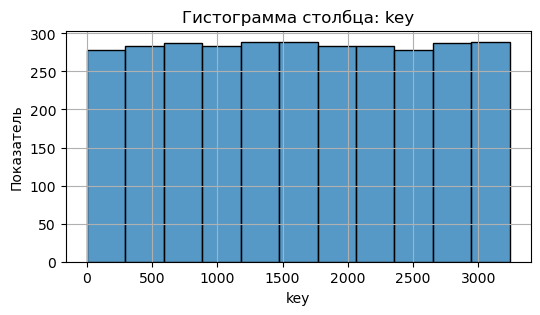

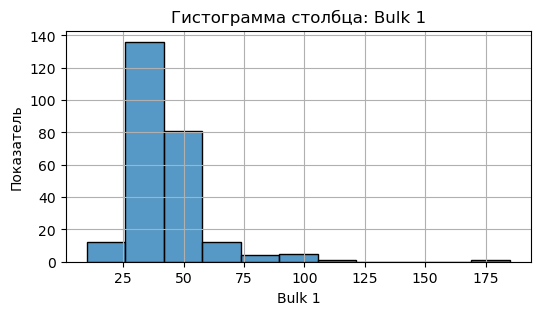

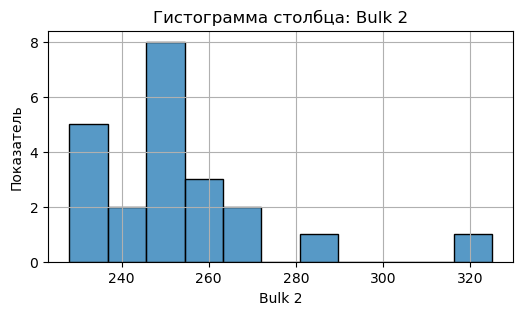

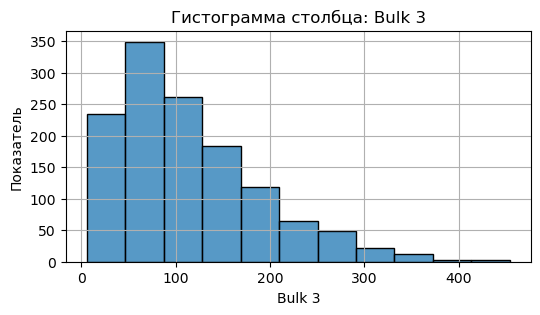

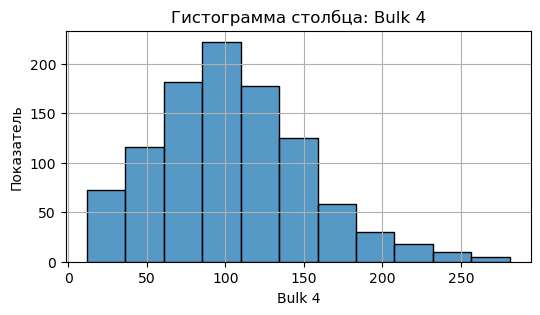

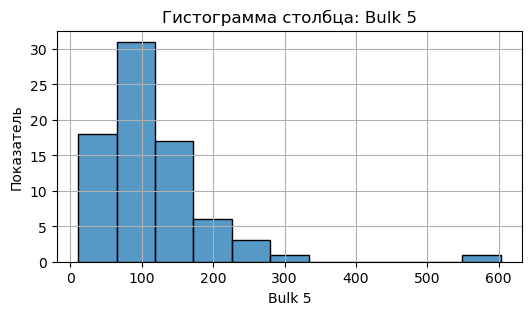

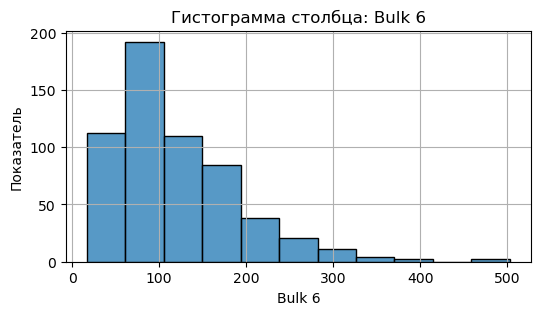

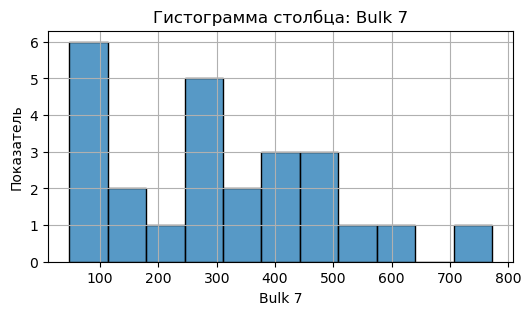

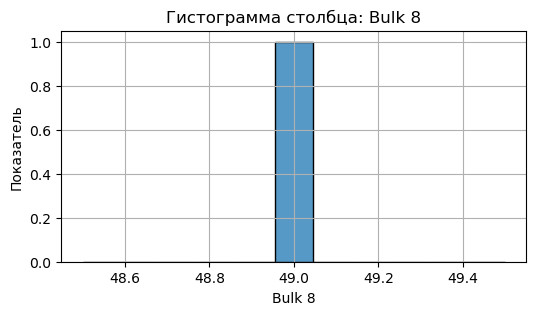

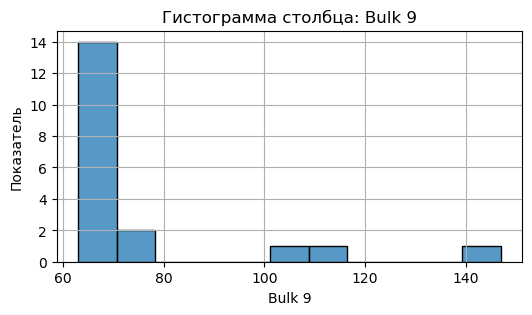

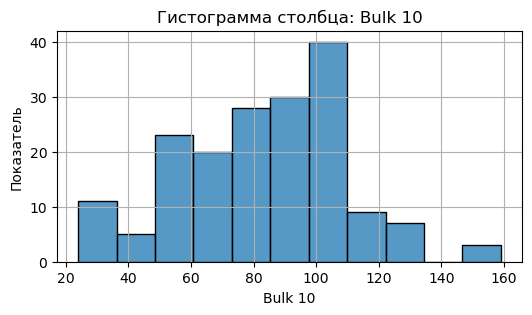

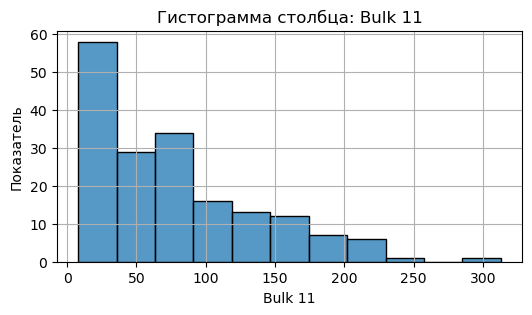

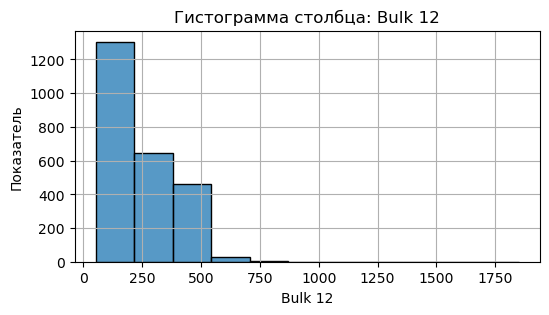

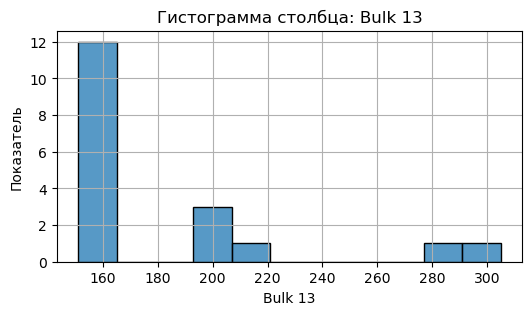

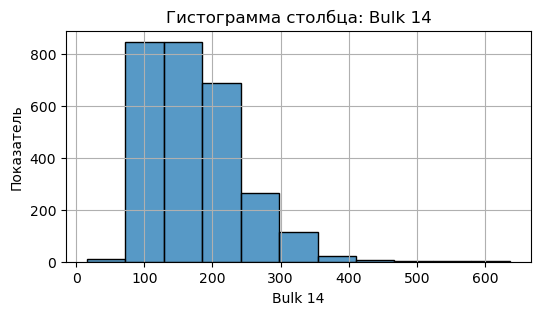

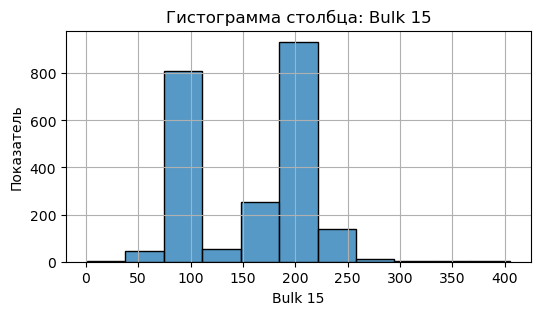

In [29]:
for column in data_bulk.columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(data_bulk[column], bins=11)
    plt.title(f"Гистограмма столбца: {column}")
    plt.xlabel(column)
    plt.ylabel("Показатель")
    plt.grid(True)
    plt.show()

На гистограммах в стоблцах "Bulk" выявлены "аномальные" значения, в последующем необходимо рассмотреть вопрос об обработке таких значений. Эти "аномалии" также могут означать, что на каких-то из пятнадцати технологических процессах сыпучие материалы не добавлялись.

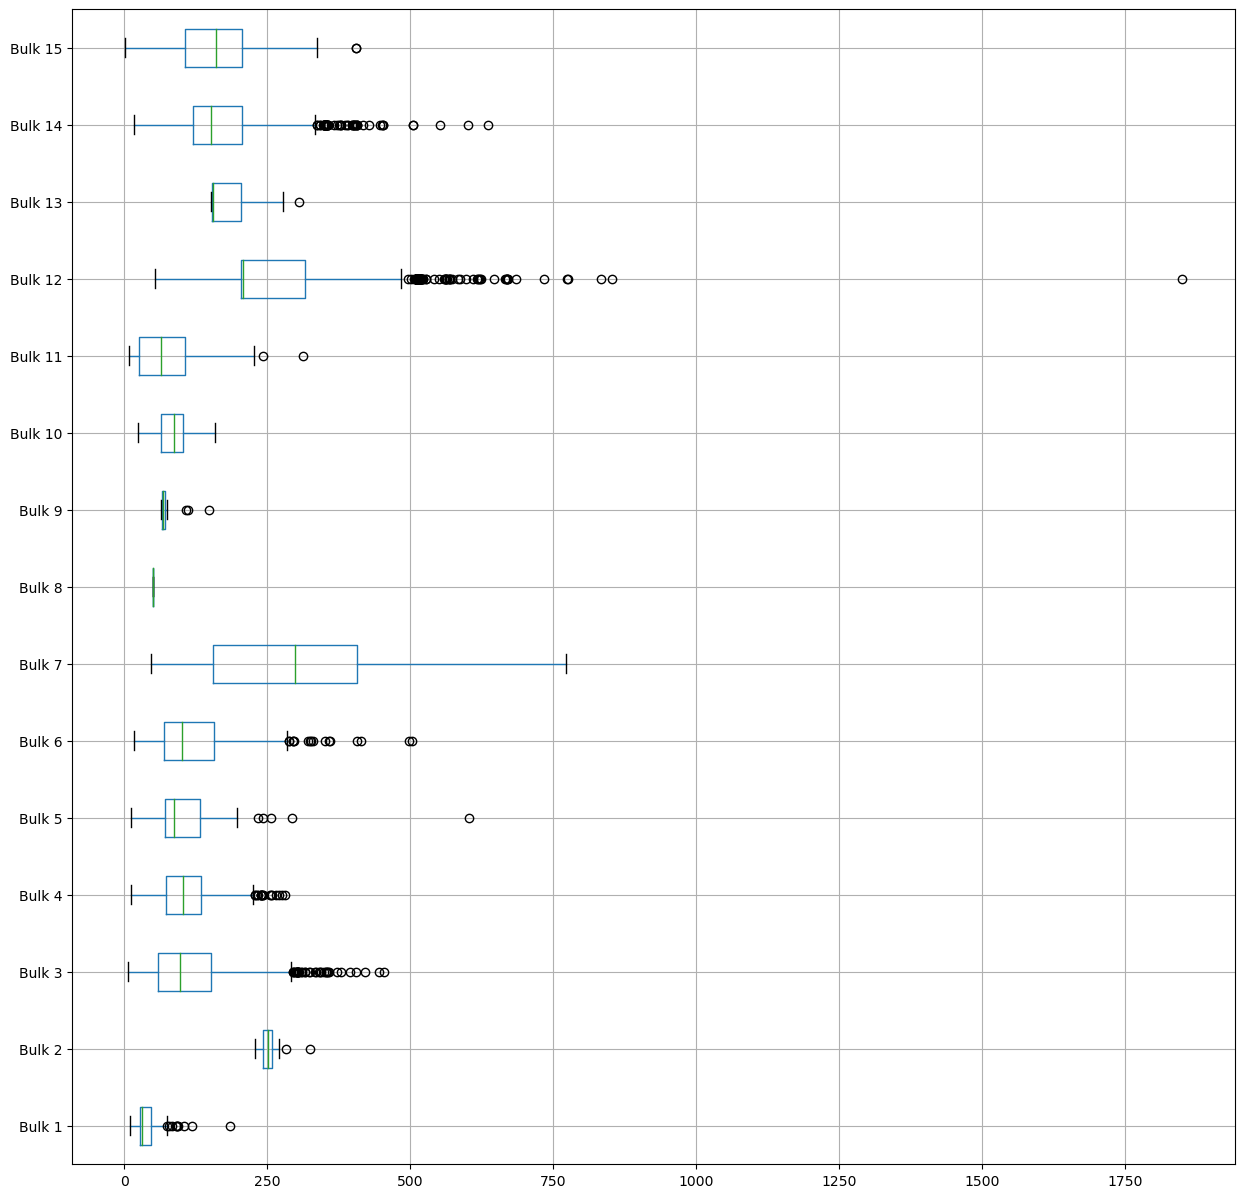

In [30]:
plt.figure(figsize=(15, 15))
data_bulk.boxplot([col for col in data_bulk.columns if col != 'key'], vert=False)
plt.show()

**Из полученной визуализации столбцов "Bulk 1" - "Bulk 15" видно:**
- Значительное количество выбросов почти во всех столбцах;
- "Bulk 8" имеет лишь один показатель;
- "Bulk 12" имеет "аномально большое значение".

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
С выбросами тут действительно важный момент. Ведь выброс выбросу рознь) Бывает, что выброс - то реальная бизнес-практика. И если удалить их, то мы получим модель, так скажем, работующую не во всех диапазонах входящих в неё факторов. Т.е. по метрикам модель будет хорошая. А вот по бизнесу - не совсем применимая.<br>А бывают выбросы - точно выбросы - ошибки учёта данных, например.<br>

В таких проектах, также лучше использовать такую философию анализа выбросов:<br>
Ящик с усами - даёт пищу для размышлений (не более того, не воспринимаем его как сигнал к действию).<br>
А потом смотрим то явление, что изучаем. Данные значения - могут быть в реальности или нет?<br>
Вот, например, в случае с температурой плавления: по справочнику она у металла = около 1400+-, т.е. 1200 - действиетльно кажется очень странным значением. А 1450 и выше выглядит вполне рабочим, не смотря на статистические границы.<br><br>
    
По выбросам в этом проекте:: супервыбросы убираем со всей выборки (реактивная и температура менее 1400). А вот если другие выбросы будешь удалять (я бы не удалял), то давай условимся так: сделаем это только на трайн выборке. А тест будет чистая от удаления. Так мы будем близки к реальным условиям.<br>
Ведь если мы удаляем выбросы, а это не выбросы, то модель становится рабочей только на ограниченно диапазоне парамеров. Т.е. мы добъёмся хорошей метрики. Но модель при этом буде малопригодной)

### Датафрейм "data_bulk_time":

#### Общий вид датафрейма:

In [31]:
display(data_bulk_time.head())

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


Данный датафрейм содержит данные о времени подачи сыпучих материалов.

#### Основная информация датафрейма:

In [32]:
print(data_bulk_time.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB
None


**Столбцы:**
- **"key"** - содержит информацию о номере партии, имеет тип данных "int64";
- **"Bulk 1" - "Bulk 15"** - содержат информацию о дате и времени начала процедуры, имеют формат "object" (необходимо рассмотреть вопрос об изменении типов данных в указанных столбцах).

#### Кол-во строк, столбцов датафрейма:

In [33]:
print(data_bulk_time.shape)

(3129, 16)


Датафрейм содержит 3129 строк и 16 столбцов.

#### Количество пропусков в данных:

In [34]:
print(data_bulk_time.isna().sum())

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64


В датафрейме выявлено значительное количество пропусков.

#### Количество дубликатов в данных:

In [35]:
print(data_bulk_time.duplicated().sum())

0


Явных дубликатов в датафрейме не выявлено.

### Датафрейм "data_gas":

#### Общий вид датафрейма:

In [36]:
display(data_gas.head())

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


Данный датафрейм содержит данные о продувке сплава газом.

#### Основная информация датафрейма:

In [37]:
print(data_gas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
None


**Столбцы:**
- **"key"** - содержит информацию о номере партии, имеет тип данных "int64";
- **"Газ 1"** - содержит информацию об объеме продвки сплава газом, имеют формат "float64".

In [38]:
display(data_gas.describe())

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


#### Кол-во строк, столбцов датафрейма:

In [39]:
print(data_gas.shape)

(3239, 2)


Датафрейм содержит 3239 строк и 2 столбца.

#### Количество пропусков в данных:

In [40]:
print(data_gas.isna().sum())

key      0
Газ 1    0
dtype: int64


Пропусков в датафрейме не выявлено.

#### Количество дубликатов в данных:

In [41]:
print(data_gas.duplicated().sum())

0


Явных дубликатов в датафрейме не выявлено.

#### Гистограммы по столбцам датафрейма:

**Столбец "key" содержит сведения о 3241 партии:**

In [42]:
print(data_gas['key'].unique())

[   1    2    3 ... 3239 3240 3241]


**Столбец "Газ 1":**

In [43]:
print('Минимальное значение:', data_gas['Газ 1'].min())
print('Максимальное значение:', data_gas['Газ 1'].max())

Минимальное значение: 0.0083985291
Максимальное значение: 77.9950396623


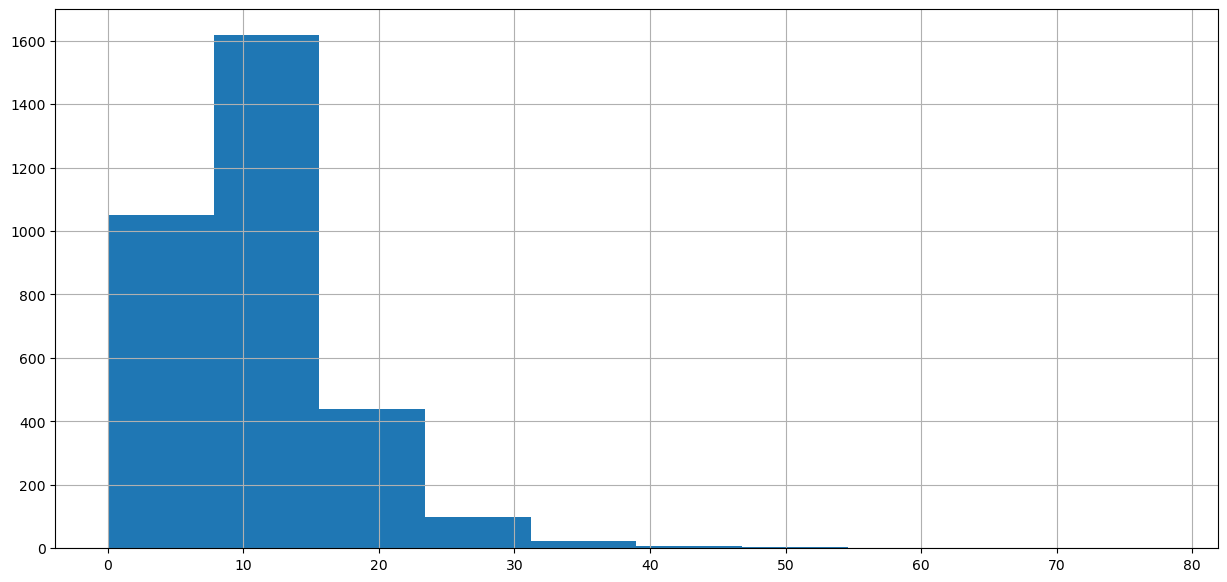

In [44]:
data_gas['Газ 1'].hist(figsize=(15, 7));

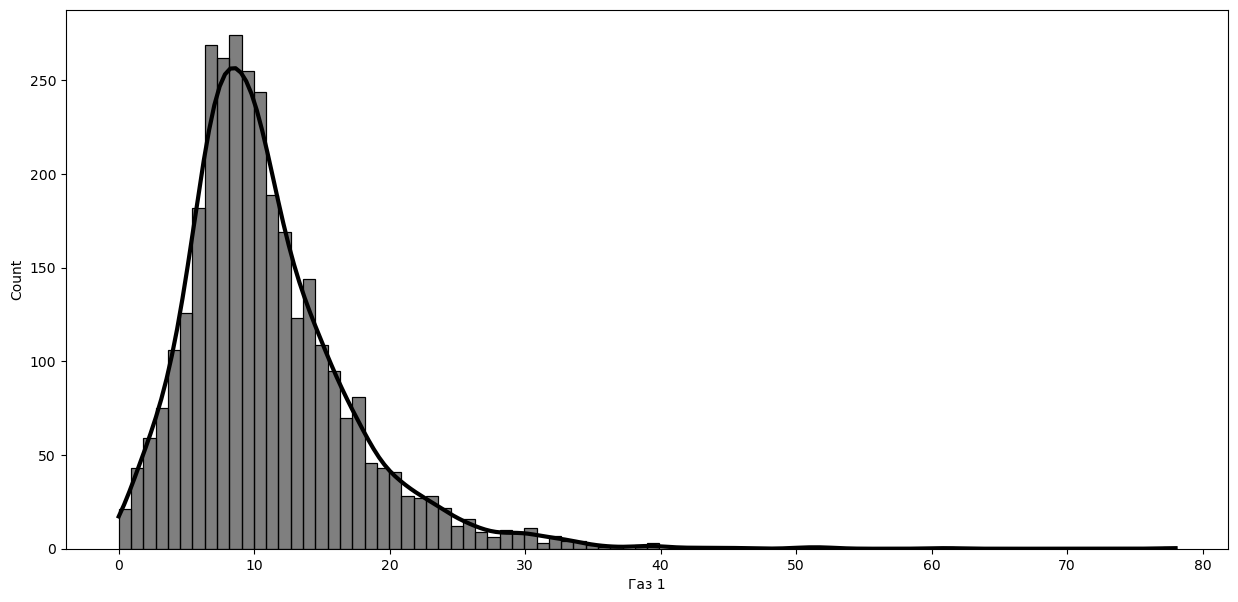

In [45]:
plt.figure(figsize=(15,7))
sns.histplot(data_gas['Газ 1'], color=['black'], kde=True, line_kws={'linewidth': 3})
plt.show()

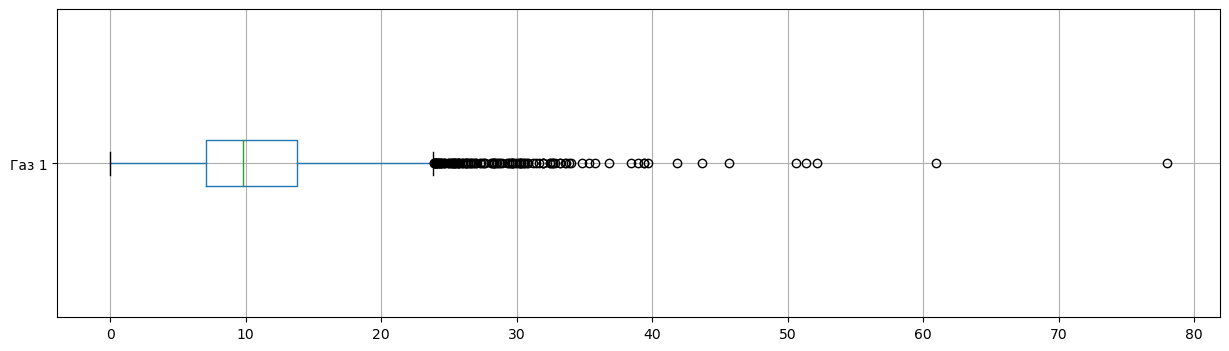

In [46]:
plt.figure(figsize=(15, 4))
data_gas.boxplot('Газ 1', vert=False)
plt.show()

В рассматриваемом датафрейме нет столбца с обозначением "даты и времени" процесса, следовательно, нет зависимости от времени.  
Таким образом, имеется только факт продувки каждой партии.  
Из количества строк видно, что каждой партии (за исключением нескольких) соответствует собственная единичная продувка.  

**Из полученной визуализации столбца "Газ 1" видно:**
- Выявлены данные (значения больше 40) которые предположительно могут являтся "аномальными", однако, это может быть и частью технологического процесса, делать однозначный вывод на данной стадии анализа нецелесообразно.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
понял

### Датафрейм "data_temp":

#### Общий вид датафрейма:

In [47]:
display(data_temp.head())

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


Данный датафрейм содержит данные о продувке сплава газом.

#### Основная информация датафрейма:

In [48]:
print(data_temp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB
None


**Столбцы:**
- **"key"** - содержит информацию о номере партии, имеет тип данных "int64";
- **"Время замера"** - содержит информацию о дате и времени замера, имеют формат "object" (необходимо рассмотреть вопрос об изменении типов данных в указанных столбцах);
- **"Температура"** - содержит информацию о температуре материала.

In [49]:
display(data_temp.describe())

,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


#### Кол-во строк, столбцов датафрейма:

In [50]:
print(data_temp.shape)

(18092, 3)


Датафрейм содержит 18092 строки и 3 столбца.

#### Количество пропусков в данных:

In [51]:
print(data_temp.isna().sum())

key                0
Время замера       0
Температура     3427
dtype: int64


Выявлено значительное количество пропусков в столбце "Температура".

#### Количество дубликатов в данных:

In [52]:
print(data_temp.duplicated().sum())

0


Явных дубликатов в датафрейме не выявлено.

#### Гистограммы по столбцам датафрейма:

**Столбец "key" содержит сведения о 3241 партии:**

In [53]:
print(data_temp['key'].unique())

[   1    2    3 ... 3239 3240 3241]


**Столбец "Температура":**

In [54]:
print('Минимальное значение:', data_temp['Температура'].min())
print('Максимальное значение:', data_temp['Температура'].max())

Минимальное значение: 1191.0
Максимальное значение: 1705.0


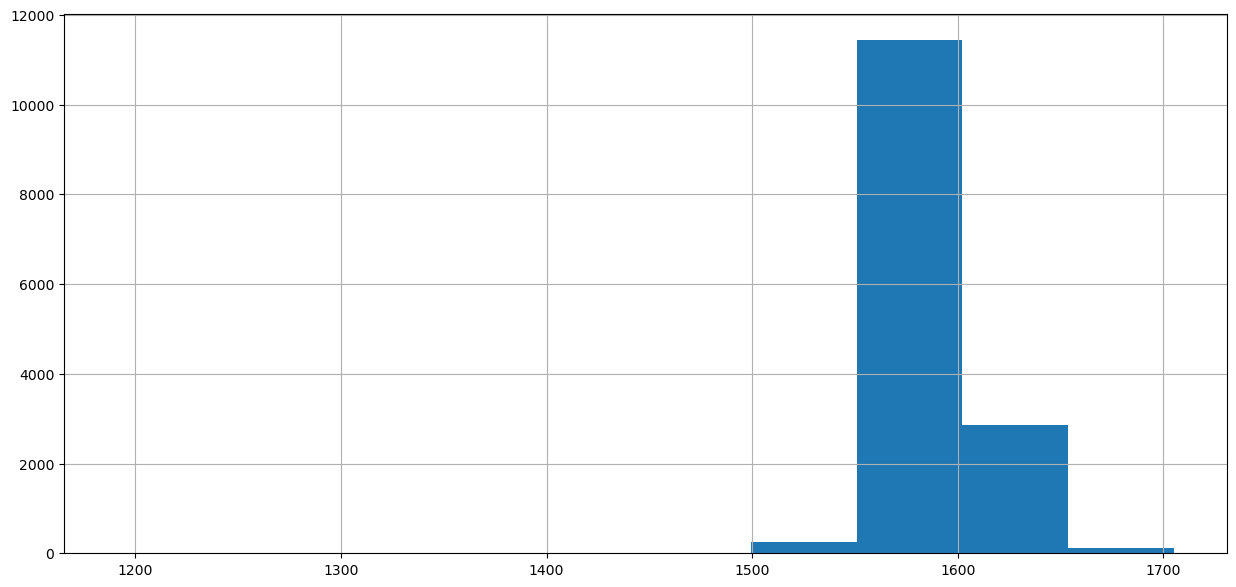

In [55]:
data_temp['Температура'].hist(figsize=(15, 7), bins=10);

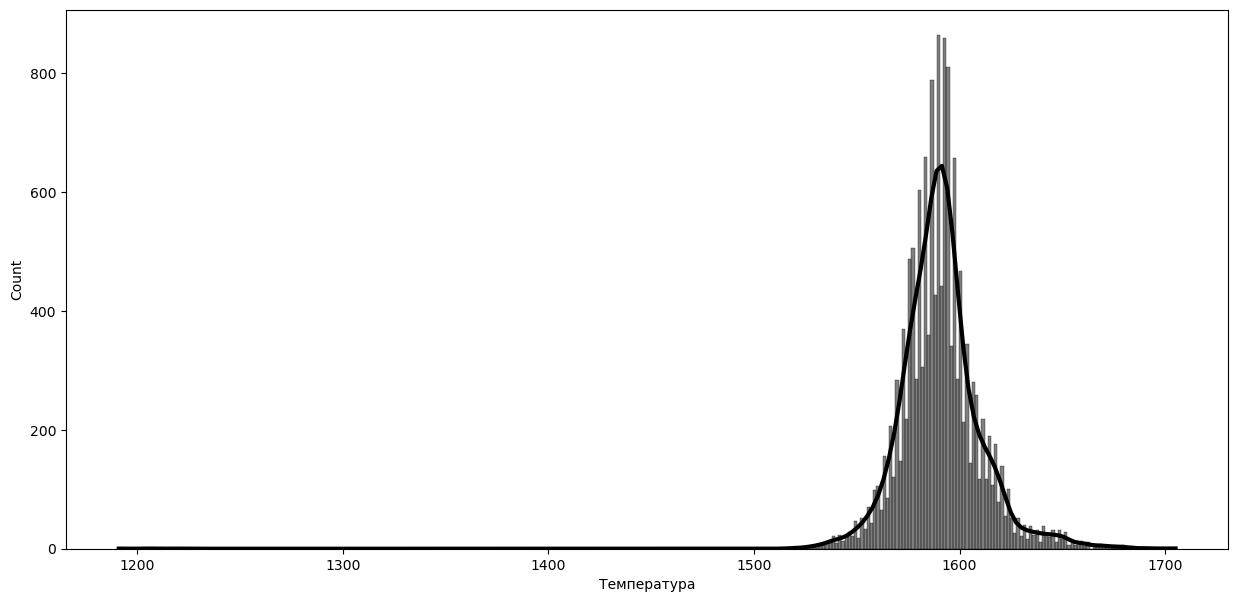

In [56]:
plt.figure(figsize=(15,7))
sns.histplot(data_temp['Температура'], color=['black'], kde=True, line_kws={'linewidth': 3})
plt.show()

**Основной объем показателей о температуре находится в диапазоне значений от "1550" до "1650", рассмотрим диапазон подробнее:**

In [57]:
print(data_temp[(data_temp['Температура'] < 1650) & (data_temp['Температура'] > 1550)]['Температура'].value_counts())

1593.0    445
1591.0    443
1589.0    437
1588.0    427
1590.0    427
         ... 
1638.0     14
1640.0     14
1647.0     12
1639.0     12
1643.0     10
Name: Температура, Length: 99, dtype: int64


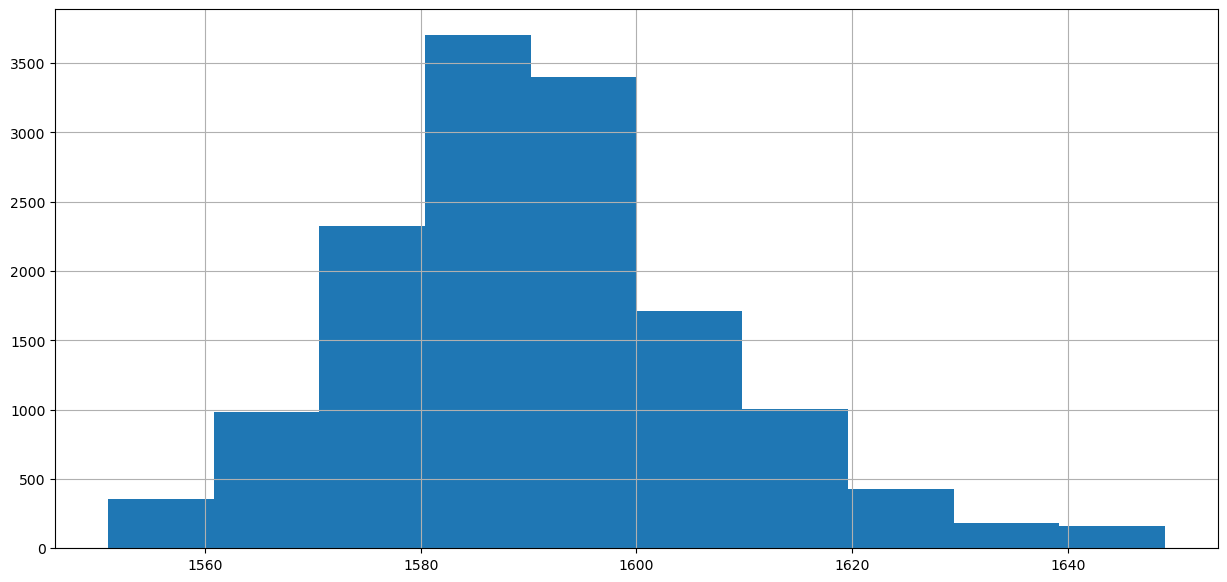

In [58]:
data_temp_temp = data_temp[(data_temp['Температура'] < 1650) & (data_temp['Температура'] > 1550)]
data_temp_temp['Температура'].hist(figsize=(15, 7));

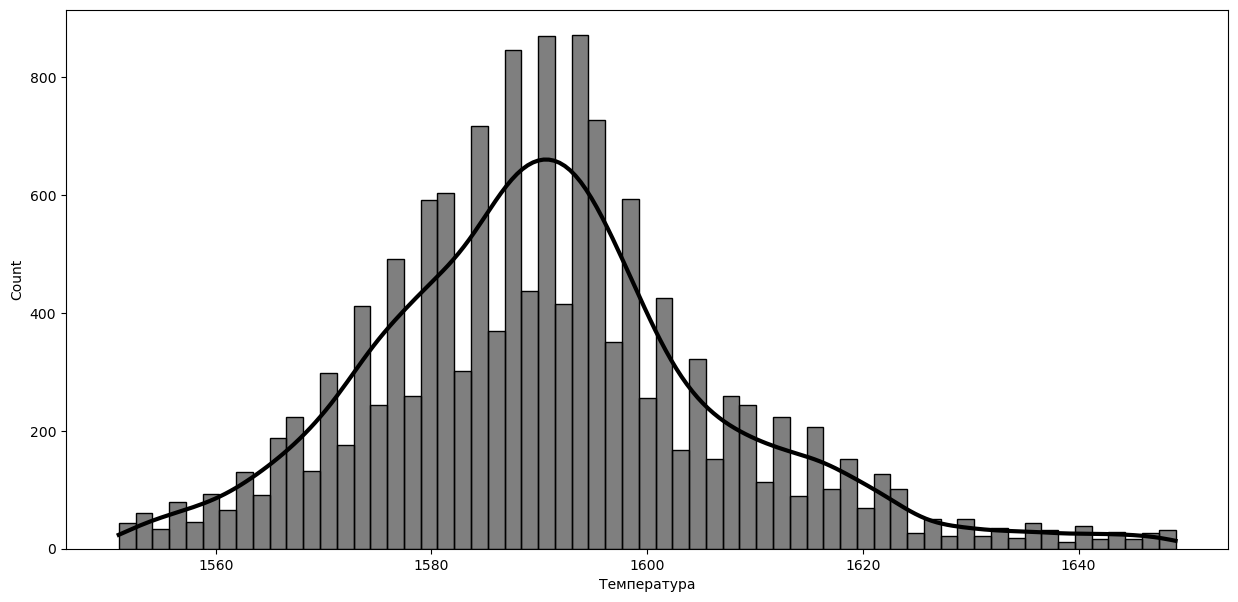

In [59]:
plt.figure(figsize=(15,7))
sns.histplot(data_temp_temp['Температура'], color=['black'], kde=True, line_kws={'linewidth': 3})
plt.show()

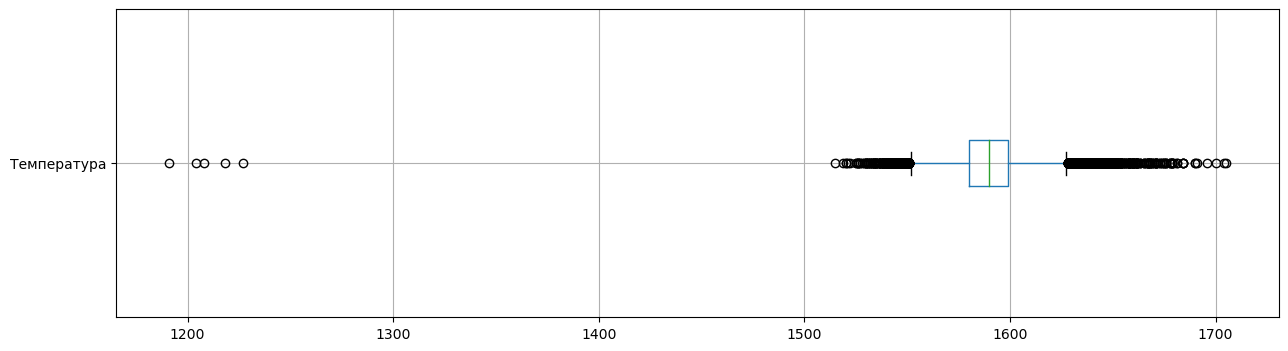

In [60]:
plt.figure(figsize=(15, 4))
data_temp.boxplot('Температура', vert=False)
plt.show()

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
и этот изучен, хорошо. Выводов не хватает( Но может в конце  оформлены...

In [61]:
del data_temp_temp

**Из полученной визуализации столбца "Температура" видно:**
- Выявлены данные (значения менее 1350) - согласно сведениям из открытых источников, температура плавления стали находится в диапазоне 1350-1450°C (в зависимости от её состава и сплавов), следовательно, значения ниже 1350°C целесообразно считать аномалией.

### Датафрейм "data_wire":

#### Общий вид датафрейма:

In [62]:
display(data_wire.head())

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Данный датафрейм содержит данные об объеме подачи проволочных материалов.

#### Основная информация датафрейма:

In [63]:
print(data_wire.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB
None


**Столбцы:**
- **"key"** - содержит информацию о номере партии, имеет тип данных "int64";
- **"Wire 1" - "Wire 9"** - содержат информацию об объеме проволочных материалов, имеют формат "float64".

#### Кол-во строк, столбцов датафрейма:

In [64]:
print(data_wire.shape)

(3081, 10)


Датафрейм содержит 3081 строку и 10 столбцов.

#### Количество пропусков в данных:

In [65]:
print(data_wire.isna().sum())

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64


Выявлено значительное количество пропусков.

#### Количество дубликатов в данных:

In [66]:
print(data_wire.duplicated().sum())

0


Явных дубликатов в датафрейме не выявлено.

#### Гистограммы по столбцам датафрейма:

**Столбец "key" содержит сведения о 3241 партии:**

In [67]:
print(data_wire['key'].unique())

[   1    2    3 ... 3239 3240 3241]


**Столбцы "key" и "Wire 1" - "Wire 9":**

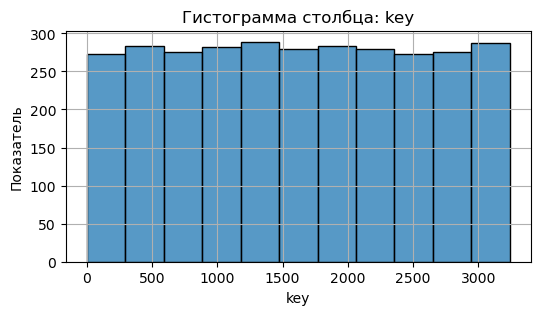

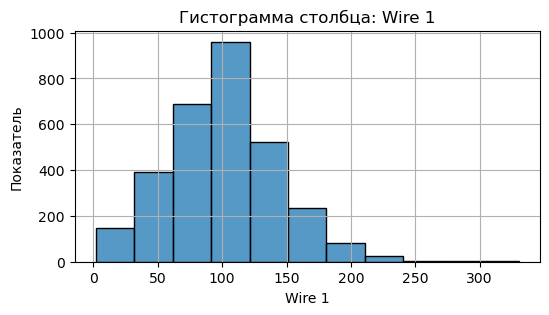

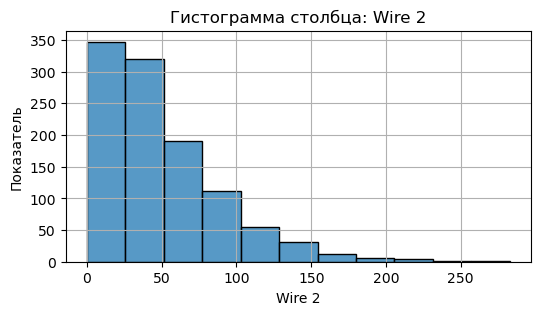

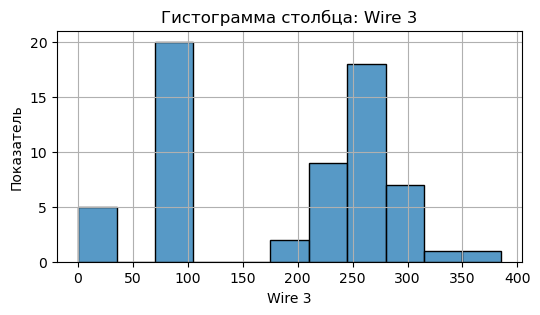

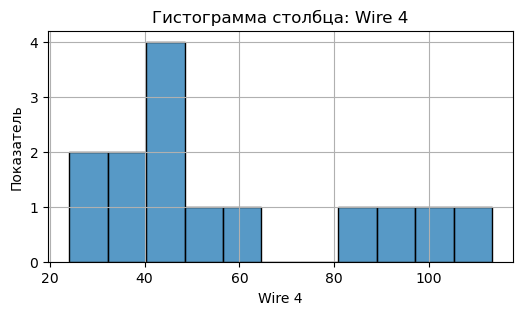

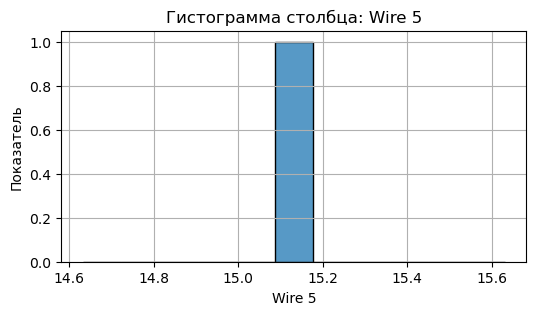

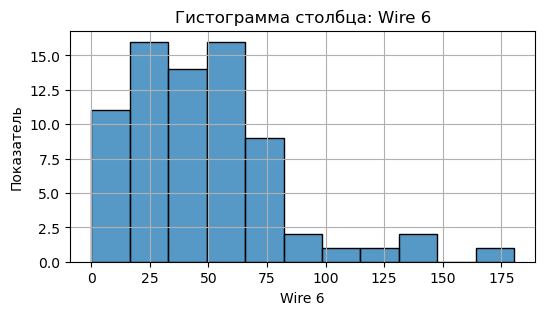

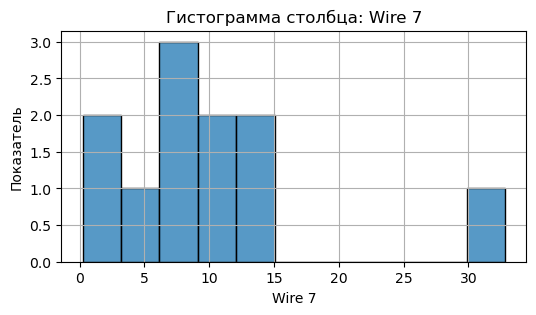

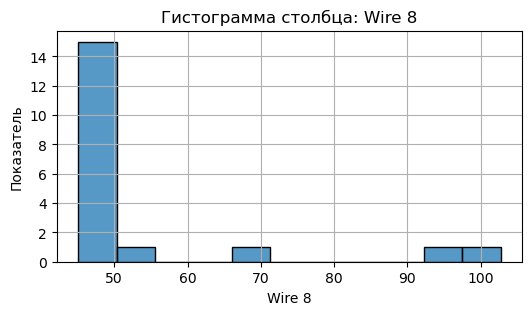

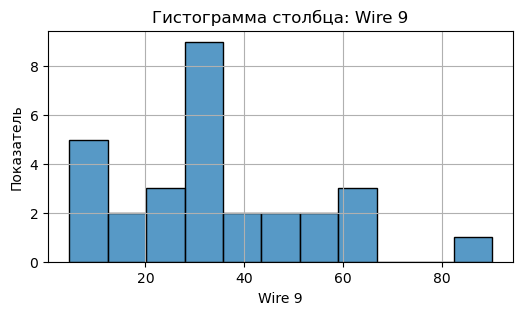

In [68]:
for column in data_wire.columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(data_wire[column], bins=11)
    plt.title(f"Гистограмма столбца: {column}")
    plt.xlabel(column)
    plt.ylabel("Показатель")
    plt.grid(True)
    plt.show()

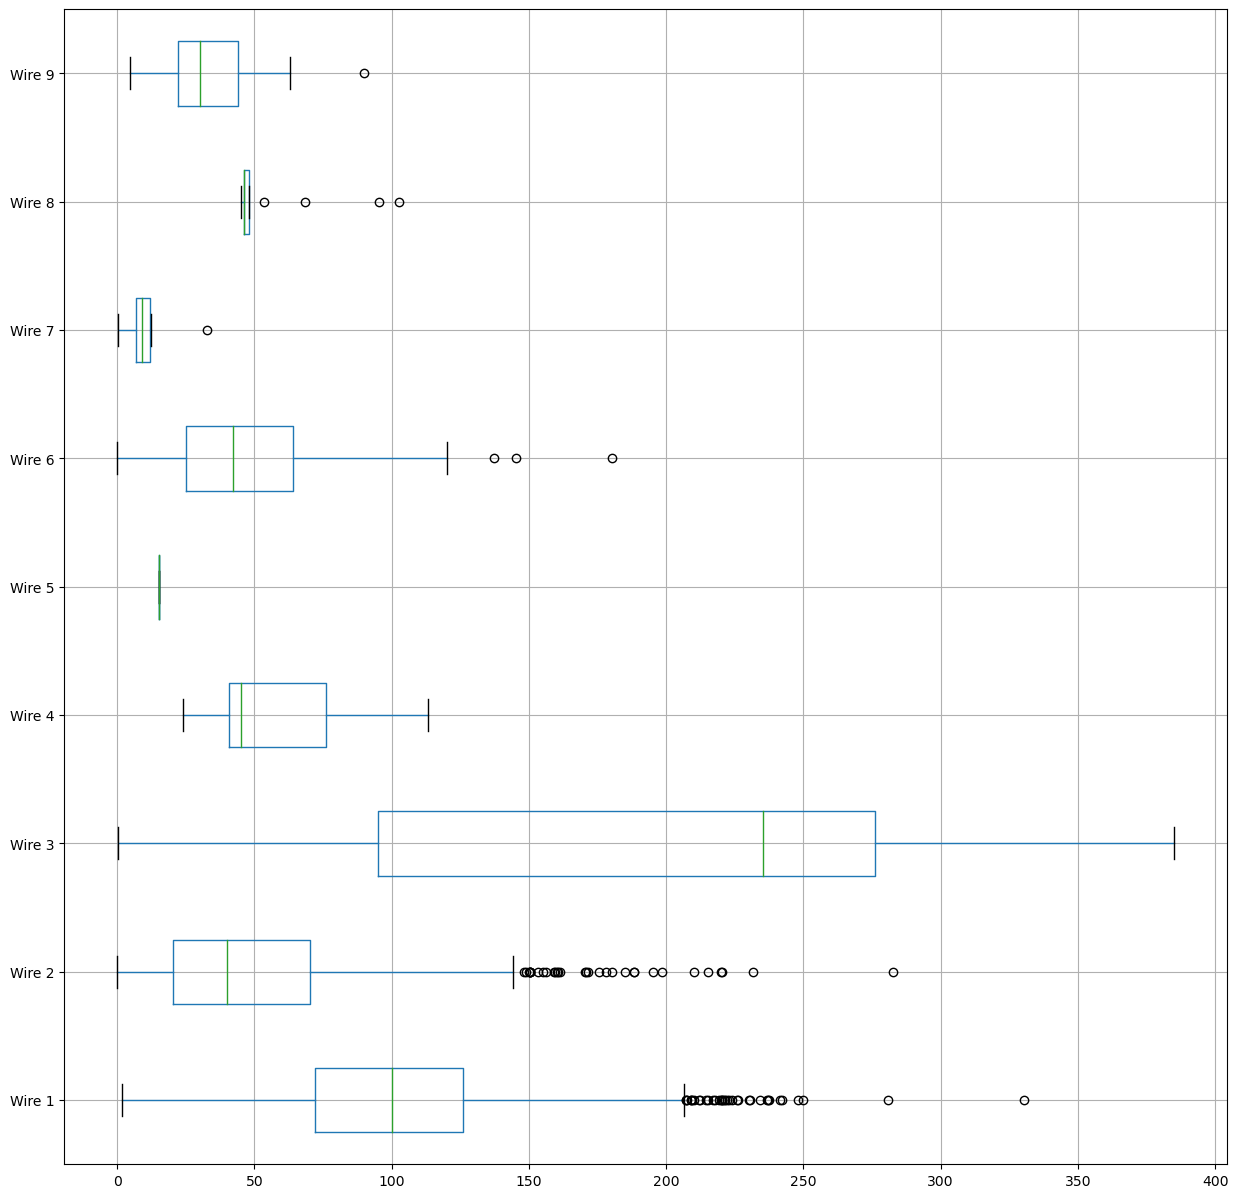

In [69]:
plt.figure(figsize=(15, 15))
data_wire.boxplot([col for col in data_wire.columns if col != 'key'], vert=False)
plt.show()

**Из полученной визуализации столбцов "Bulk 1" - "Bulk 15" видно:**
- Значительное количество выбросов почти во всех столбцах;
- "Wire 5" имеет лишь один показатель.

### Датафрейм "data_wire_time":

#### Общий вид датафрейма:

In [70]:
display(data_wire_time.head())

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Данный датафрейм содержит данные о времени подачи проволочных материалов.

#### Основная информация датафрейма:

In [71]:
print(data_wire_time.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB
None


**Столбцы:**
- **"key"** - содержит информацию о номере партии, имеет тип данных "int64";
- **"Wire 1" - "Wire 9"** - содержат информацию о дате и времени начала процедуры, имеют формат "object" (необходимо рассмотреть вопрос об изменении типов данных в указанных столбцах).

#### Кол-во строк, столбцов датафрейма:

In [72]:
print(data_wire_time.shape)

(3081, 10)


Датафрейм содержит 3081 строку и 10 столбцов.

#### Количество пропусков в данных:

In [73]:
print(data_wire_time.isna().sum())

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64


В датафрейме выявлено значительное количество пропусков.

#### Количество дубликатов в данных:

In [74]:
print(data_wire_time.duplicated().sum())

0


Явных дубликатов в датафрейме не выявлено.

## Вывод:

Проведенным первичным анализом установлено:

**В датафрейме "data_arc" содержатся данные**:
- об электродах (нагрев сырья);
- о времени начала, конца и мощности нагрева.  
  
**В датафреймах "data_bulk"/"data_bulk_time" и "data_wire"/"data_wire_time" содержатся данные**:
- о подаче примесей (сыпучих и проволочных материалов);
- о времени и объеме подачи материалов.  
  
В датафреймах выявлено значительное количество пропусков, которые, вероятнее всего, означают, что на данной итерации технологического процесса примесь не добавлялась. Целесообразно заполнить пропуски "нулевыми" значениями.
  
**В датафрейме "data_gas" содержатся данные**:
- о процессе продувки сплава газом.  
  
В датафрейме отсутствуют временные промежутки - имеются данные об общей подаче газа.  
  
  
**В датафрейме "data_temp" содержатся данные**:
- о результате измерения температуры.  
  
В указанном датафрейме содержится целевой признак, необходимый для исследования - конечная температура. В датафрейме выявлены пропуски данных (целевого признака), такие строки вероятнее всего придется исключить из анализа.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
ОК, Игорь, с первичным анализом - хоршо. Есть и аналитика, и графика, и выводы!! Это верно.<br>

## План проекта:

**На этапе предобработки данных целесообразно выполнить следующие действия:**
- ***Датафрейм "data_arc":***
    - Переименование столбцов датафрейма;
    - Приведение столбцов "Начало нагрева дугой" и "Конец нагрева дугой" к типу данных - "дата и время";
    - Удаление единственного "аномального" значения в столбце "Реактивная мощность".
- ***Датафрейм "data_bulk":***
    - Рассмотреть вопрос о целесообразоности обработки пропусков данных;
    - Рассмотреть вопрос о целесообразоности обработки "аномальных" значений.
- ***Датафрейм "data_bulk_time":***
    - Рассмотреть вопрос о целесообразоности обработки пропусков данных.
- ***Датафрейм "data_gas":***
    - Переименование столбцов датафрейма.
- ***Датафрейм "data_temp":***
    - Переименование столбцов датафрейма;
    - Приведение столбца "Время замера" к типу данных - "дата и время";
    - Рассмотреть вопрос о целесообразоности обработки пропусков данных:
    - Рассмотреть вопрос о целесообразоности обработки "аномальных" значений.
- ***Датафрейм "data_wire":***
    - Рассмотреть вопрос о целесообразоности обработки пропусков данных;
    - Рассмотреть вопрос о целесообразоности обработки "аномальных" значений.
- ***Датафрейм "data_wire_time":***
    - Рассмотреть вопрос о целесообразоности обработки пропусков данных.
  
- ***Рассмотреть вопрос об объединении датафреймов*** (data_bulk + data_bulk_time; data_wire + data_wire_time; или объедиднение всех датафреймов в один).
  
- ***Проверить данные на адекватность,*** исключить из анализа строки, не прошедшие данную проверку.
  
- ***Исключить из анализа строки, с отсутствующим целевым признаком.***  
  
- ***Выполнить проверку на мультиколлинеарность,*** с использованием "матрицы корреляции".  
  
**На этапе построения модели целесообразно выполнить следующие действия:**
- ***Разделить данные на тестовую и тренировочную выборки.***
- ***Выбрать и обучить модели, изучить полученные метрики.***
  
**Сделать итоговый вывод об исследовании.**

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
С планом - ОК. Сюда же можно включить проверку на мультиколлинеарность ДО моделирования и анализ важности факторов у модели-победителя).

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
ОК, Игорь, Я так понимаю, что новых вопросо нет.<br>
Если возникнут - обязательно пиши!!! Да и всегда в чате сможем встретиться. Ну или напиши со следующей итреацией. Постараюсь ответить быстро!<br>
Что ж, тогда вперёд к успешному моделированию)<br>

# Предобработка данных:

## Переименование столбцов:

In [75]:
data_arc = data_arc.rename(columns={'Начало нагрева дугой': 'Start_of_arc_heating',
                                    'Конец нагрева дугой': 'End_of_arc_heating',
                                    'Активная мощность': 'Active_power',
                                    'Реактивная мощность': 'Reactive_power'})

In [76]:
data_gas = data_gas.rename(columns={'Газ 1': 'Gas'})

In [77]:
data_temp = data_temp.rename(columns={'Время замера': 'Measuring_time',
                            'Температура': 'Temperature'})

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>ОК

## Приведение столбцов к типу данных - "дата и время":

In [78]:
data_arc['Start_of_arc_heating'] = pd.to_datetime(data_arc['Start_of_arc_heating'], format='%Y-%m-%d %H:%M:%S')
data_arc['End_of_arc_heating'] = pd.to_datetime(data_arc['End_of_arc_heating'], format='%Y-%m-%d %H:%M:%S')
data_temp['Measuring_time'] = pd.to_datetime(data_temp['Measuring_time'], format='%Y-%m-%d %H:%M:%S')

In [79]:
COUNT_BULK = 15
COUNT_WIRE = 9

for i in range(1, COUNT_BULK+1):
    data_bulk_time[f"Bulk {i}"] = pd.to_datetime(data_bulk_time[f"Bulk {i}"], format='%Y-%m-%d %H:%M:%S')
    
for i in range(1, COUNT_WIRE+1):
    data_wire_time[f"Wire {i}"] = pd.to_datetime(data_wire_time[f"Wire {i}"], format='%Y-%m-%d %H:%M:%S')

## Удаление "аномальных" значений:

**Удаление единственного отрицательного значения в столбце "Реактивная мощность" датафрейма "data_arc":**

In [80]:
data_arc = data_arc[data_arc['Reactive_power'] > 0]

**Удаление неправдоподобных значений в столбце "Температура" датафрейма "data_temp":**

In [81]:
data_temp = data_temp[data_temp['Temperature'] >= 1350]

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>тут понятно.

## Обработка пропусков данных, исключение из анализа малозначимых (аномальных или иных, мешающих исследованию) данных, добавление новых признаков:

### Датафрейм "data_arc":

Датафрейм "data_arc" не содержит пропусков данных.

**Рассчитаем полную мощность из имеющихся данных:**

In [82]:
data_arc['Apparent_power'] = (data_arc['Active_power']** 2 + data_arc['Reactive_power']** 2)**(0.5)

**Расчитаем суммарное время нагрева:**

In [83]:
data_arc['Total_time_heating'] = (data_arc['End_of_arc_heating'] - data_arc['Start_of_arc_heating']).apply(pd.Timedelta.total_seconds).astype('int')

**Исходя из имеющихся данных о времени нагрева и полной мощности - рассчитаем затраченную энергию:**

In [84]:
data_arc['Energy'] = data_arc['Total_time_heating'] * data_arc['Apparent_power']

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>новые факторы в танцах, отлично.

**Сгруппируем данные и добавим информацию о количестве циклов нагрева:**

In [85]:
data_arc_temporary1 = data_arc.groupby('key').sum()[['Total_time_heating', 'Energy', 'Apparent_power']].reset_index()
data_arc_temporary2 = data_arc.groupby('key').count()['Total_time_heating'].reset_index()

In [86]:
data_arc_new = pd.merge(data_arc_temporary1, data_arc_temporary2, how="left", on="key")
data_arc_new = data_arc_new.rename(columns={'Total_time_heating_x': 'Total_time_heating', 'Total_time_heating_y': 'Count_time_heating'})
data_arc_new = data_arc_new.reindex(columns=['key', 'Apparent_power', 'Energy', 'Total_time_heating', 'Count_time_heating'])

In [87]:
display(data_arc_new.head(5))

,key,Apparent_power,Energy,Total_time_heating,Count_time_heating
0,1,3.718736,770.282114,1098,5
1,2,2.588349,481.760005,811,4
2,3,5.019223,722.837668,655,5
3,4,3.400038,683.455597,741,4
4,5,2.816980,512.169934,869,4


In [88]:
del data_arc_temporary1
del data_arc_temporary2

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>идём дальше)

### Датафрейм "data_gas":

Датафрейм "data_gas" не содержит пропусков данных.

### Датафреймы "data_bulk" и "data_bulk_time", "data_wire" и "data_wire_time":

Датафреймы "data_bulk", "data_bulk_time", "data_wire", "data_wire_time" являются идентичными по смысловому содержанию и содержат значительное количество пропусков.

**Рассмотрим добавление каждого из пятнадцати сыпучих материалов в общем технологическом процессе:**

In [89]:
print(data_bulk.apply(lambda x: f"{(x.count()/len(x))*100:.2f}%"))

key        100.00%
Bulk 1       8.05%
Bulk 2       0.70%
Bulk 3      41.48%
Bulk 4      32.41%
Bulk 5       2.46%
Bulk 6      18.41%
Bulk 7       0.80%
Bulk 8       0.03%
Bulk 9       0.61%
Bulk 10      5.62%
Bulk 11      5.66%
Bulk 12     78.30%
Bulk 13      0.58%
Bulk 14     89.68%
Bulk 15     71.84%
dtype: object


Text(0.5, 0, 'Тип сыпучего материала:')

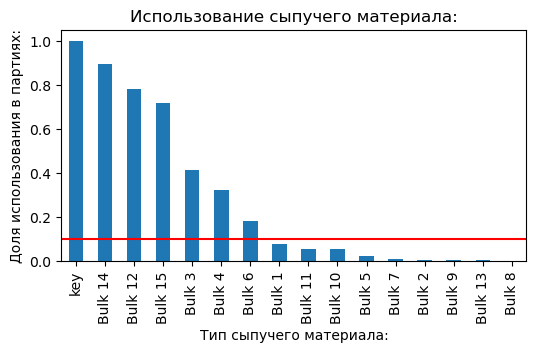

In [90]:
plt.figure(figsize = (6,3))
ax = data_bulk.notna().mean().sort_values(ascending=False).plot(kind = 'bar')
ax.axhline(y=0.1, color='r', linestyle='-')
ax.set_title('Использование сыпучего материала:')
ax.set_ylabel('Доля использования в партиях:')
ax.set_xlabel('Тип сыпучего материала:')

**Рассмотрим добавление каждого из девяти проволочных материалов в общем технологическом процессе:**

In [91]:
print(data_wire.apply(lambda x: f"{(x.count()/len(x))*100:.2f}%"))

key       100.00%
Wire 1     99.16%
Wire 2     35.02%
Wire 3      2.04%
Wire 4      0.45%
Wire 5      0.03%
Wire 6      2.37%
Wire 7      0.36%
Wire 8      0.62%
Wire 9      0.94%
dtype: object


Text(0.5, 0, 'Тип сыпучего материала:')

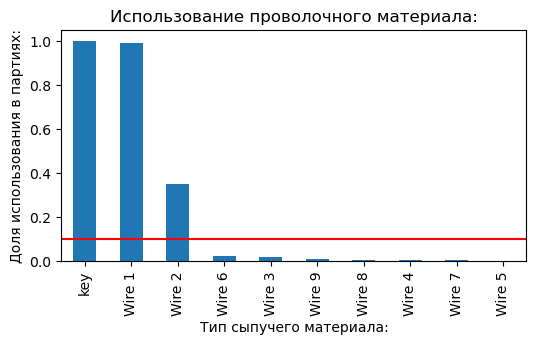

In [92]:
plt.figure(figsize = (6,3))
ax = data_wire.notna().mean().sort_values(ascending=False).plot(kind = 'bar')
ax.axhline(y=0.1, color='r', linestyle='-')
ax.set_title('Использование проволочного материала:')
ax.set_ylabel('Доля использования в партиях:')
ax.set_xlabel('Тип сыпучего материала:')

**Выявлены материалы (Bulk 1-2, 5, 7-11, 13 и Wire 3-9), которые использовались в технологических процессах 0,03% - 8,05% (менее 10%) случаев, целесообразно исключить из анализа указанные материалы:**

In [93]:
data_bulk = data_bulk.drop(['Bulk 1', 'Bulk 2', 'Bulk 5', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 13'], axis=1)
data_bulk_time = data_bulk_time.drop(['Bulk 1', 'Bulk 2', 'Bulk 5', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 13'], axis=1)
data_wire = data_wire.drop(['Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9'], axis=1)
data_wire_time = data_wire_time.drop(['Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9'], axis=1)

**Т.к. эти датафреймы содержат информацию о добавлении объема сыпучих/проволочных материалов в определенное время в сплав - отсутствие значений вероятнее всего означает, что материалы не добавлялись, следовательно, целесообразно заменить пропуски значений на "ноль":**

In [94]:
data_bulk = data_bulk.fillna(0)
data_bulk_time = data_bulk_time.fillna(0)
data_wire = data_wire.fillna(0)
data_wire_time = data_wire_time.fillna(0)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>ясно.

### Датафрейм "data_temp":

**Последняя зафиксированная температура сплава является целевым признаком, следовательно, строки в которых отсутствует целевой признак необходимо исключить из анализа:**

In [95]:
data_temp = data_temp.dropna()

**При этом, по условиям исследования, необходимо наличие не менее двух замеров температуры сплава (стартовый и финальный), следовательно, если по уникальному номеру партии присутствует лишь один замер - такие строки также необходимо исключить из анализа:**

In [96]:
data_temp = data_temp[data_temp['key'].isin(data_temp['key'].value_counts()[data_temp['key'].value_counts()>1].index)]
print(data_temp.shape)

(13920, 3)


**Т.к. в исследовании присутствуют и промежуточные замеры температуры (между стартовым и финальным) - такие строки также необходимо исключить из анализа:**

In [97]:
data_temp_first = pd.merge(data_temp.groupby('key')['Measuring_time'].agg('min'), data_temp, how="left", on="Measuring_time")
data_temp_last = pd.merge(data_temp.groupby('key')['Measuring_time'].agg('max'), data_temp, how="left", on="Measuring_time")
data_temp_new = pd.merge(data_temp_first[['key', 'Temperature']], data_temp_last[['key', 'Temperature']], how="outer", on="key")
data_temp_new = data_temp_new.rename(columns={'Temperature_x': 'Temperature_First', 'Temperature_y': 'Temperature_Last'})

**Рассчитаем количество времени, прошедшее между замерами температуры:**

In [98]:
data_temp_new = pd.merge(data_temp_new, data_temp[['key', 'Measuring_time']].groupby('key')['Measuring_time'].agg(lambda x: x.max()-x.min()).dt.total_seconds(), how='left', on='key')
data_temp_new = data_temp_new.rename(columns={'Measuring_time': 'Measurement_time'})

In [99]:
display(data_temp_new.head())

,key,Temperature_First,Temperature_Last,Measurement_time
0,1,1571.0,1613.0,1714.0
1,2,1581.0,1602.0,1265.0
2,3,1596.0,1599.0,1753.0
3,4,1601.0,1625.0,1220.0
4,5,1576.0,1602.0,1536.0


In [100]:
del data_temp_first
del data_temp_last

## Объединение таблиц в единый датафрейм:

In [101]:
data = pd.merge(data_arc_new, data_gas, how="inner", on=["key"])
data = pd.merge(data, data_bulk, how="inner", on=["key"])
data = pd.merge(data, data_wire, how="inner", on=["key"])
data = pd.merge(data, data_temp_new, how="inner", on=["key"])
data = data.reindex(columns=['key', 'Apparent_power', 'Energy', 'Total_time_heating', 'Count_time_heating', 'Measurement_time', 'Gas', 'Bulk 3', 'Bulk 4', 'Bulk 6', 'Bulk 12', 'Bulk 14', 'Bulk 15', 'Wire 1', 'Wire 2', 'Temperature_First', 'Temperature_Last'])
data = data.set_index('key')

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ ТИМЛИДА 3</b></u><p>Тут такой момент: нам нужно отобрать только те ковши, по которым есть информация во всех таблицвх. Т.е. обязательно должна быть какая-то "движуха":) по ковшу на производственном этапе. Если данных нет - значит не качественно выгрузили данные. И такие ковши  - удаляем из работы. И мержевание по иннер тут как раз поможет избавиться от лишних партий. Посомтри, пожалуйста.</p>
</div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
<b>👋:</b> Изменил (выше) объединение в единый датафрейм способом "inner".
<br/>   

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 4</b></u></p>есть контакт)

In [102]:
data.isna().sum()

Apparent_power        0
Energy                0
Total_time_heating    0
Count_time_heating    0
Measurement_time      0
Gas                   0
Bulk 3                0
Bulk 4                0
Bulk 6                0
Bulk 12               0
Bulk 14               0
Bulk 15               0
Wire 1                0
Wire 2                0
Temperature_First     0
Temperature_Last      0
dtype: int64

In [103]:
data = data.dropna(subset=["Temperature_Last"])
data = data.dropna(subset=["Gas"])
data["Bulk 3"] = data["Bulk 3"].fillna(0)
data["Bulk 4"] = data["Bulk 4"].fillna(0)
data["Bulk 6"] = data["Bulk 6"].fillna(0)
data["Bulk 12"] = data["Bulk 12"].fillna(0)
data["Bulk 14"] = data["Bulk 14"].fillna(0)
data["Bulk 15"] = data["Bulk 15"].fillna(0)
data["Wire 1"] = data["Wire 1"].fillna(0)
data["Wire 2"] = data["Wire 2"].fillna(0)

In [104]:
data.isna().sum()

Apparent_power        0
Energy                0
Total_time_heating    0
Count_time_heating    0
Measurement_time      0
Gas                   0
Bulk 3                0
Bulk 4                0
Bulk 6                0
Bulk 12               0
Bulk 14               0
Bulk 15               0
Wire 1                0
Wire 2                0
Temperature_First     0
Temperature_Last      0
dtype: int64

In [105]:
print(data.shape)

(2329, 16)


In [106]:
display(data.head())

,Apparent_power,Energy,Total_time_heating,Count_time_heating,Measurement_time,Gas,Bulk 3,Bulk 4,Bulk 6,Bulk 12,Bulk 14,Bulk 15,Wire 1,Wire 2,Temperature_First,Temperature_Last
key,,,,,,,,,,,,,,,,
1,3.718736,770.282114,1098,5,1714.0,29.749986,0.0,43.0,0.0,206.0,150.0,154.0,60.059998,0.00000,1571.0,1613.0
2,2.588349,481.760005,811,4,1265.0,12.555561,0.0,73.0,0.0,206.0,149.0,154.0,96.052315,0.00000,1581.0,1602.0
3,5.019223,722.837668,655,5,1753.0,28.554793,0.0,34.0,0.0,205.0,152.0,153.0,91.160157,0.00000,1596.0,1599.0
4,3.400038,683.455597,741,4,1220.0,18.841219,0.0,81.0,0.0,207.0,153.0,154.0,89.063515,0.00000,1601.0,1625.0
5,2.816980,512.169934,869,4,1536.0,5.413692,0.0,78.0,0.0,203.0,151.0,152.0,89.238236,9.11456,1576.0,1602.0


## Проверка на мультиколлинеарность:

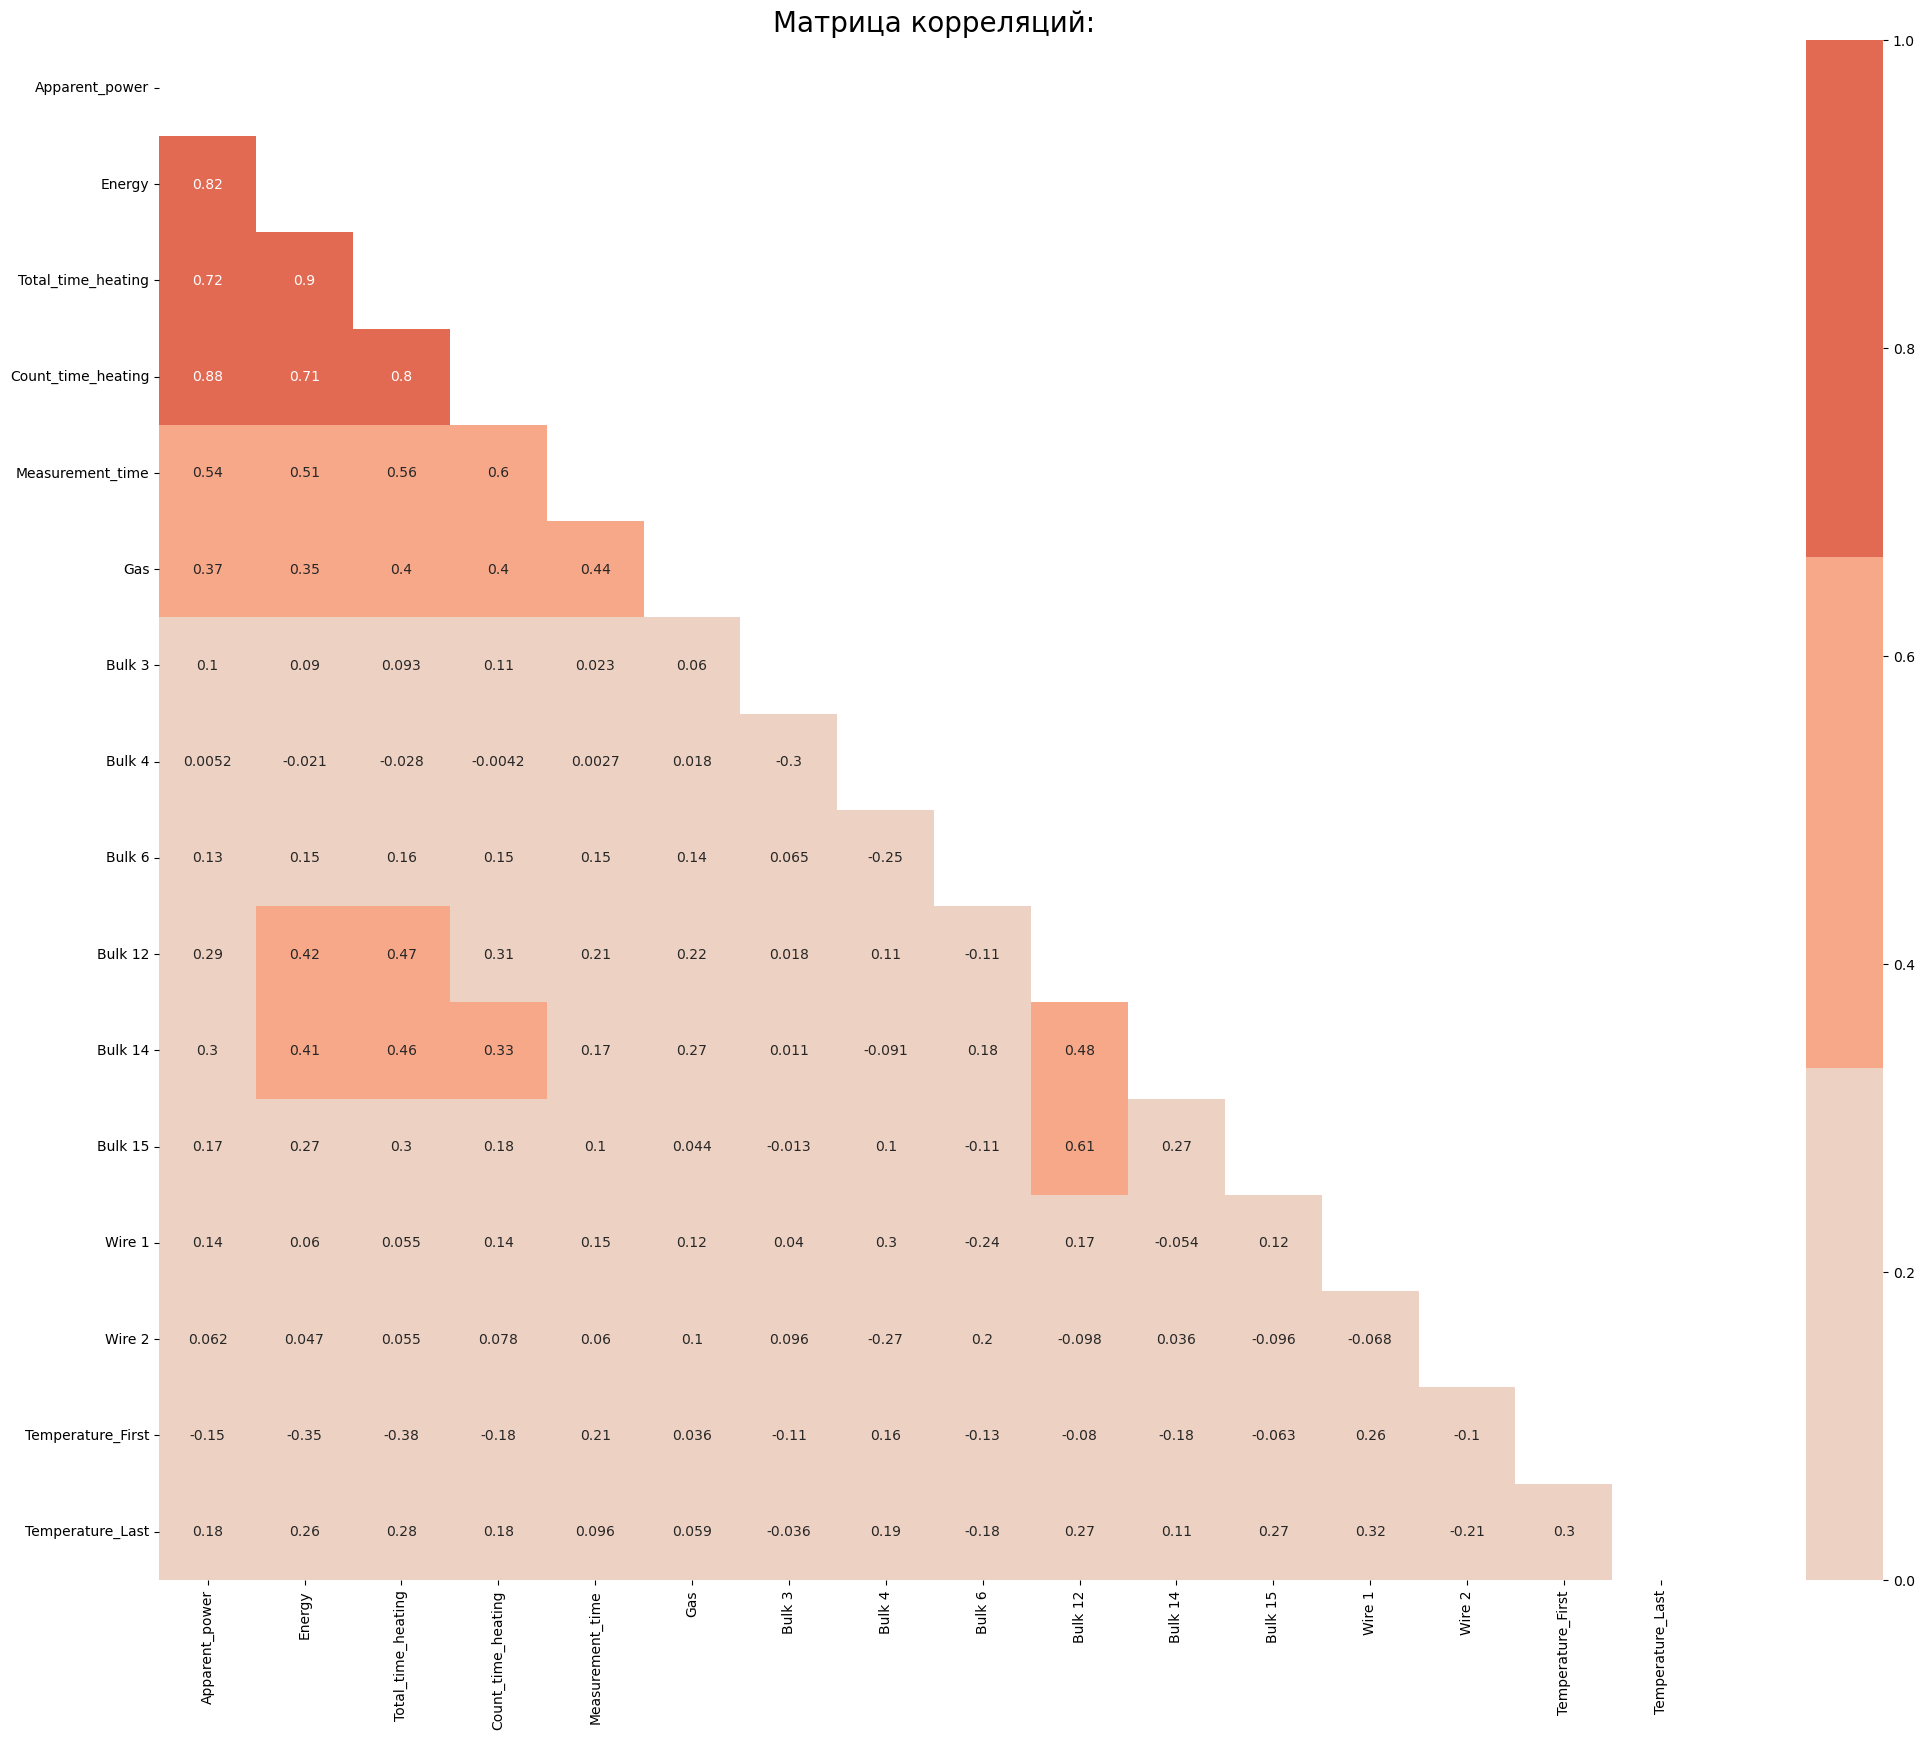

In [107]:
f, ax = plt.subplots(figsize=(25, 20))
cmap = sns.color_palette("coolwarm")
matrix = np.triu(data.corr())
ax = sns.heatmap(data.corr(), cmap=cmap, mask=matrix, annot=True, vmax=1, vmin=0, center=0, linewidths=0, xticklabels=True, yticklabels=True)
plt.title('Матрица корреляций:', fontsize=20)
plt.show()

**Выявлена мультиколлениарность признаков, между:**
- 'Apparent_power' и 'Energy';
- 'Apparent_power' и 'Total_time_heating';
- 'Apparent_power' и 'Count_time_heating';
- 'Energy' и 'Total_time_heating';
- 'Energy' и 'Count_time_heating';
- 'Total_time_heating' и 'Count_time_heating'.

**Исключим из анализа признаки 'Apparent_power', 'Count_time_heating' и 'Total_time_heating':**

In [108]:
data = data.drop(['Apparent_power', 'Count_time_heating', 'Total_time_heating'], axis=1)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>согласен

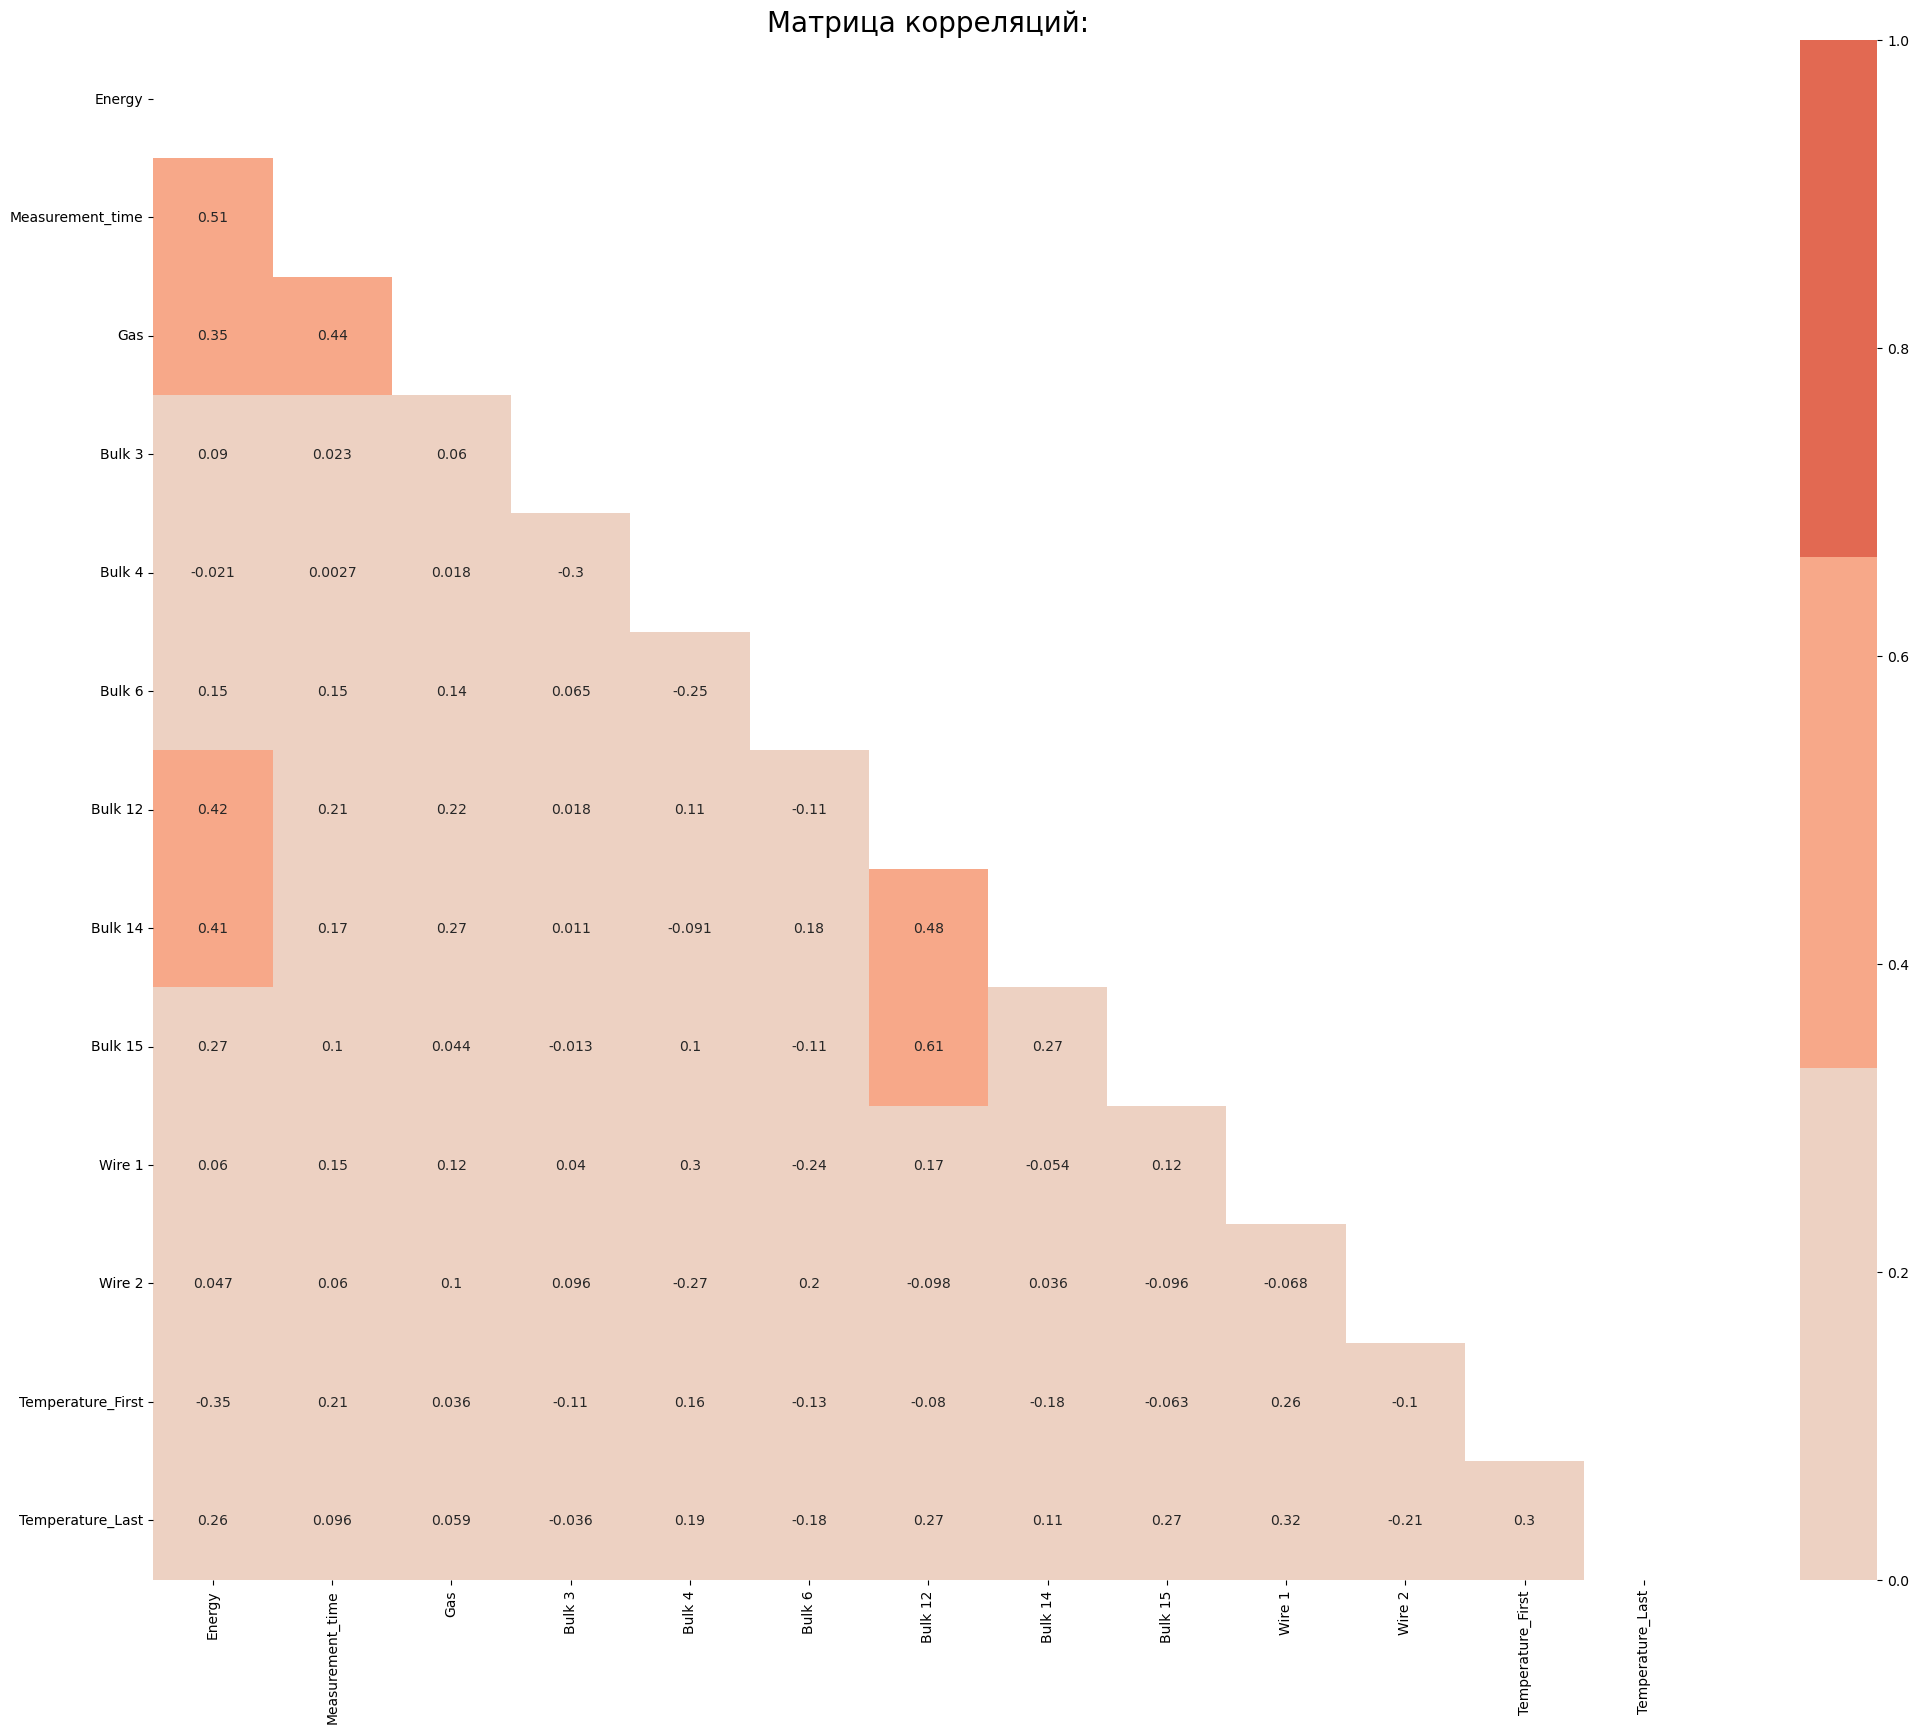

In [109]:
f, ax = plt.subplots(figsize=(25, 20))
cmap = sns.color_palette("coolwarm")
matrix = np.triu(data.corr())
ax = sns.heatmap(data.corr(), cmap=cmap, mask=matrix, annot=True, vmax=1, vmin=0, center=0, linewidths=0, xticklabels=True, yticklabels=True)
plt.title('Матрица корреляций:', fontsize=20)
plt.show()

## Вывод:

**В результате проведенной предобработки данных:**
- Изменены наименования столбцов.
- Данные по столбцам приведены к нужным типам.
- Исключены из анализа "аномальные" значения.
- Обработаны пропуски данных.
- Исключены из анализа данные о материалах, которые использовались менее чем в 10% случаев.
- Из анализа исключены "лишние" признаки.
- В исследование добавлены "новые" признаки.
- Таблицы объединены в единый датафрейм.
- Проведена проверка на мультиколлениарность, из анализа исключены признаки, корреляция между которыми составила более 80% по коэффициенту Пирсона.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>Классная работа по разделу! Вопрос только с лишними ковшами - выше постарался аргументировать.

# Модели машинного обучения:

В исследовании будут использоваться следующие модели:
- Линейная регрессия;
- Случайный лес;
- CatBoost;
- LightGBM.

## Разделение данных на выборки:

Так как в исходных данных информация располагалась в хронологическом порядке, применим "перемешивание" данных:

In [110]:
features = data.drop(['Temperature_Last'], axis=1)
target = data['Temperature_Last']
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target,
                                                                            test_size=0.25,
                                                                            random_state=state)

In [111]:
print('Тренировочная выборка:', features_train.shape[0])
print('Тестовая выборка:', features_test.shape[0])

Тренировочная выборка: 1746
Тестовая выборка: 583


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>
ОК

##  Линейная регрессия:

Для модели Линейной регрессии выполним масштабирование признаков:

In [112]:
scaler = StandardScaler()
features_train_scal = scaler.fit_transform(features_train)
features_test_scal = scaler.transform(features_test)

model_LR = LinearRegression()
param_grid = {'fit_intercept': [True, False],
              'normalize': [True, False]}
grid_search = GridSearchCV(model_LR, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(features_train_scal, target_train)
print("Наилучшие параметры:", grid_search.best_params_)
best_score_LR = -grid_search.best_score_
print("Наилучшая оценка:", best_score_LR)
best_model_LR = grid_search.best_estimator_

In [113]:
model_LR = LinearRegression()

scores = cross_val_score(model_LR, features_train_scal, target_train, cv=5, scoring='neg_mean_absolute_error')
best_score_LR = -scores.mean()
print("Наилучшая оценка:", best_score_LR)

model_LR.fit(features_train_scal, target_train)
best_model_LR = model_LR

Наилучшая оценка: 6.623266917849927


<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>
    <p>Идейно понятно. Но тут лучше так:<br>
Вот здесь в param_grid - собственно и не параметры модели. масштабирование уже есть (нормалайз не нужен. Да и исключили его в обновлнной библиоеке), fit_intercept - отключение/подключение константы, нам надо всегда использовать консанту. Поэтому здесь, в линейной регресси лучше использовать не гридсёрч а cross_val_score<br>
</p>
</div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
<b>👋:</b> Изменил (выше) обучение модели через "cross_val_score".
<br/>   

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 4</b></u></p>ОК!

##  Случайный лес:

In [114]:
model_RF = RandomForestRegressor()
param_grid = {
    'n_estimators': [151],
    'max_depth': [None, 10],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
    'bootstrap': [True]
}
grid_search = GridSearchCV(model_RF, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(features_train, target_train)
print("Наилучшие параметры:", grid_search.best_params_)
best_score_RF = -grid_search.best_score_
print("Наилучшая оценка:", best_score_RF)
best_model_RF = grid_search.best_estimator_

Наилучшие параметры: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 151}
Наилучшая оценка: 6.536109099413167


##  CatBoost:

In [115]:
model_cb = CatBoostRegressor()

param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [1, 3, 5],
    'verbose': [False]
}

grid_search = GridSearchCV(model_cb, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(features_train, target_train)

print("Наилучшие параметры:", grid_search.best_params_)
best_score_cb = -grid_search.best_score_
print("Наилучшая оценка:", best_score_cb)

best_model_cb = grid_search.best_estimator_

Наилучшие параметры: {'depth': 6, 'iterations': 300, 'l2_leaf_reg': 5, 'learning_rate': 0.05, 'verbose': False}
Наилучшая оценка: 6.322262696178006


##  LightGBM:

In [116]:
model_lgb = lgb.LGBMRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [None, 5, 10],
    'min_child_samples': [1, 5, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
grid_search = GridSearchCV(model_lgb, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(features_train, target_train)
print("Наилучшие параметры:", grid_search.best_params_)
best_score_lgb = -grid_search.best_score_
print("Наилучшая оценка:", best_score_lgb)
best_model_lgb = grid_search.best_estimator_

Наилучшие параметры: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_samples': 1, 'n_estimators': 100, 'subsample': 0.8}
Наилучшая оценка: 6.446201436806082


##  Полученные результаты:

In [117]:
MAE_score = {'Модель': ['CatBoost', 'LightGBM', 'Random Forest', 'Linear Regression'],
        'MAE': [best_score_cb, best_score_lgb, best_score_RF, best_score_LR]}

MAE_score = pd.DataFrame(MAE_score)
MAE_score['MAE'] = MAE_score['MAE'].sort_values(ascending=True)
display(MAE_score)

,Модель,MAE
0,CatBoost,6.322263
1,LightGBM,6.446201
2,Random Forest,6.536109
3,Linear Regression,6.623267


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>Отдельный респект за итоговую табличку.

**Лучший показатель метрики "MAE" достигнут у модели CatBoost с параметрами:**
- 'depth': 6,
- 'iterations': 300,
- 'l2_leaf_reg': 5,
- 'learning_rate': 0.05.

##  Тестирование модели:

In [118]:
predictions_cb = best_model_cb.predict(features_test)
mae_cb = mean_absolute_error(target_test, predictions_cb)
print('Показатель метрики "MAE" на тестовой выборке составил:', mae_cb)

Показатель метрики "MAE" на тестовой выборке составил: 6.700674175077518


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>Тестируем лучшую - ОК.

##  Проверка модели:

**Для проверки адекватности модели сравненим модель CatBoost с базовой моделью:**

In [119]:
mean_baseline = np.mean(target_train)
predictions_baseline = np.full_like(target_test, fill_value=mean_baseline)
mae_baseline = mean_absolute_error(target_test, predictions_baseline)
print("MAE модели CatBoost:", mae_cb)
print("MAE базовой модели (среднее значение):", mae_baseline)

MAE модели CatBoost: 6.700674175077518
MAE базовой модели (среднее значение): 8.307808684000083


##  Влияние признаков на прогноз модели:

In [120]:
feature_importances = best_model_cb.feature_importances_
data_feature_importances = pd.DataFrame(feature_importances, columns=['Importance'])
data_feature_importances['Feature'] = features_train.columns
data_feature_importances = data_feature_importances.sort_values('Importance', ascending=False)
display(data_feature_importances)

,Importance,Feature
11,20.998364,Temperature_First
0,18.818497,Energy
9,10.153853,Wire 1
1,9.003220,Measurement_time
6,8.583645,Bulk 12
5,7.191995,Bulk 6
8,6.802408,Bulk 15
7,6.057627,Bulk 14
2,4.811014,Gas
10,4.545395,Wire 2


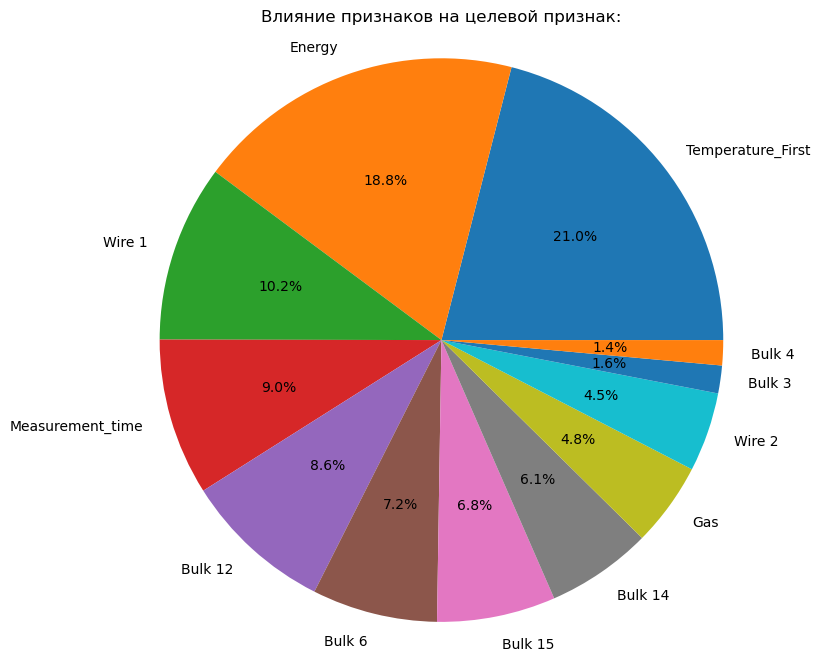

In [121]:
plt.figure(figsize=(8, 8))
plt.pie(data_feature_importances['Importance'], labels=data_feature_importances['Feature'], autopct='%1.1f%%')
plt.title('Влияние признаков на целевой признак:')
plt.axis('equal')
plt.show()

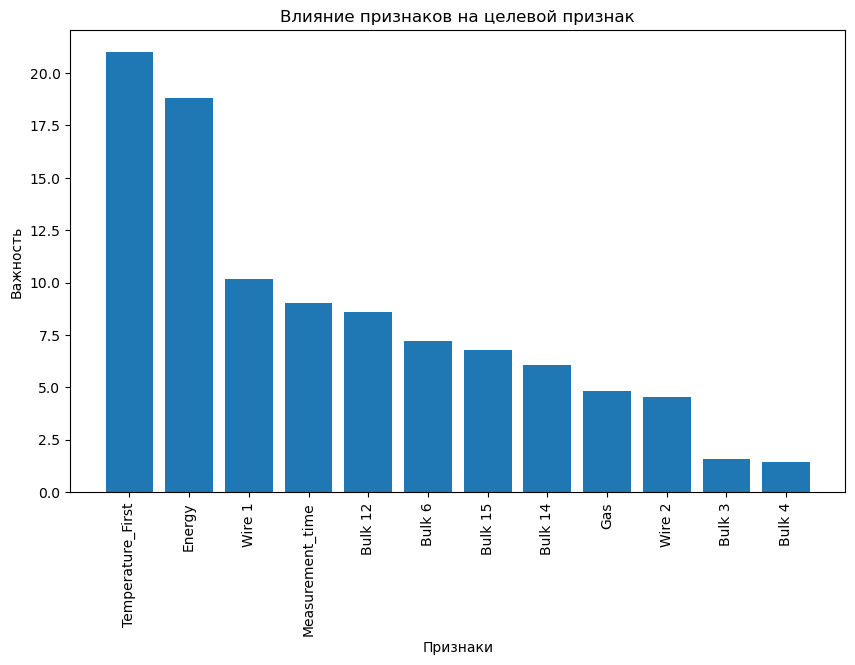

In [122]:
plt.figure(figsize=(10, 6))
plt.bar(data_feature_importances['Feature'], data_feature_importances['Importance'])
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Влияние признаков на целевой признак')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>ОК. На начальном этапе мы можем нагенерить множество разных фич, в том чтисле и лишних. И вот этот инструмент, вкупе с анализом мультиколлинеарности позволяет избавляться от "балласта"). И этот баллст можно исключить и перестроить модель. Метрика не должна силно измениться. (как на мой взгляд - столбчтые графики интереснее)))

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
<b></b> Добавил (выше) вывод и столбчатой диаграммы.  
<br/>   

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
<b></b> Добавил (ниже) переобучение модели с исключением "малозначимых" признаков.
<br/>   

**Определено следующее влияние признаков на итоговый прогноз:**
- Наиболее значимое влияние оказывают параметры:
    - Temperature_First ,
    - Energy,
    - Wire 1.
- Минимально значимое влияние оказывают параметры:
    - Bulk 4,
    - Bulk 3.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>
ОК, Игорь, скажу,что ещё один уверненный шаг к финалу этой истории!<br>
Обработка данных, модельная работа, конечные результаты - многое удалось как надо<br> Очень здорово, что сразу ищешь новые фичи, думаешь над ними, анализируешь. Это тот самый подход, который нужен, чтобы искать ту саму модель для заказчика)<br> Осталось лишь несколько вопросов с моей стороны))<br>
<font color='red'>    
1) есть лишние ковши, постарался аргументировать<br><br>

2) по линейной регрессии - тоже оставил комментарий<br>
    
<font color='green'>
<font color='green'>
Однозначно видно, что ты технически сделал хорошую работу.<br>
Осталось малость)<br>

Спасибо)<br>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ.

##  Переобучение CatBoost с исключением признаков с минимально значимым влиянием:

In [123]:
features_new = data.drop(['Temperature_Last', 'Bulk 4', 'Bulk 3'], axis=1)
target_new = data['Temperature_Last']
features_train_new, features_test_new, target_train_new, target_test_new = train_test_split(features_new, 
                                                                            target_new,
                                                                            test_size=0.25,
                                                                            random_state=state)

In [124]:
model_cb_new = CatBoostRegressor()

param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [1, 3, 5],
    'verbose': [False]
}

grid_search_new = GridSearchCV(model_cb_new, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_new.fit(features_train_new, target_train_new)

print("Наилучшие параметры:", grid_search_new.best_params_)
best_score_cb_new = -grid_search_new.best_score_
print("Наилучшая оценка:", best_score_cb_new)

best_model_cb_new = grid_search_new.best_estimator_

Наилучшие параметры: {'depth': 6, 'iterations': 300, 'l2_leaf_reg': 5, 'learning_rate': 0.05, 'verbose': False}
Наилучшая оценка: 6.289829776349674


In [125]:
predictions_cb_new = best_model_cb_new.predict(features_test_new)
mae_cb_new = mean_absolute_error(target_test_new, predictions_cb_new)
print('Метрика "MAE" на тестовой выборке до исключения:', mae_cb)
print('Метрика "MAE" на тестовой выборке после исключения:', mae_cb_new)

Метрика "MAE" на тестовой выборке до исключения: 6.700674175077518
Метрика "MAE" на тестовой выборке после исключения: 6.663895734039287


**Исключение "малозначимых" признаков привело к улучшению метрики "MAE".**

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>
Привет, Игорь, увидел твои комментари/коорректировки. Принято.<br>
Т.е. с проектом тогда всё. НО есть пару моментов, которые попрошу вместе с отчётом доделать:<br>
1) Выбоать ОДНУ модель в итоге.  Т.е. в отчёт длжна пойти конкретно лучшая модель<br>
2) И надо применитть eature_importances_ к лучшей модели. В начале ты пишешь, что ознакомился с ней. Но в проекте я её не увдел((( В отчёте тоже надо график важности вставить!<br>
 
 
Всегда стараюсь на этом проекте сказать всем вот ещё что: цель заказчика - экономия энергоресурсов.<br>
И в этом проекте искали как раз способ точно предсказывать температуру. И круто использовали для этого весь арсенал<br>
А если рассуждать с позиции такой: а что нужно сделать, чтобы снизить энергопотребление?<br>
Судя по модели, самым важным фактором является первая температура. Это значит, что управляя ею, мы сможем управлять энергозатратами. Вывод понятен. Теперь надо разработать мероприятия для этого решения. И тут вопрос возникает сам собой: а это так точно? мы можем управлять первой температурой? В общем, наша модель - только начало работы над энергоэффективностью.<br>
    
Так же есть ещё одна идея, которую хотел предложить тебе на обсуждение.<br>
Возможно, покажется интересным<br><br> 

Дело касается принципиально иного подхода к поиску решения для снижения энергопотребления на производстве<br>
Смотри, Создание данной модели (таково было задание) двигалось по пути "угадывания" температуры<br>
Но мы же знаем жизнь)) лёгкие колебания температур (как и нашего настроения, нашего веса.....)<br>
есть всегда. Более того - будут вегда! И нам что, стараться угадывать их?<br>
Не угонимся, "пупок" развяжется))))) <br>
Предложу для подобных проектов подумать вот в какую сторону<br>
    
Итак, разброс в измерениях - есть, был и будет!! (т.к. этому благоприятствует разнообразие факторов самого проиозводства)<br>
    Тогда задачу можно поставить так: <u>надо уменьшить разброс в измерениях</u>. В данном случае в температуре.<br>
Один из подходов такой: Наверняка есть границы, в пределах которых колебания температур - дело нормальное.<br>
А что, если фиксировать случаи, когда температура выходит за эти границы?<br>
Скажем, как "1". И тогда для таких моментов времени собирать инфо по производству: <br>
а что был за материал (химия материала), что был за газ (химический состав газа), какая бригада работала, <br>
что там было с электродами, ограничения только в фантазиях ну и в знаниях самого производства..... <br>
И вот тут можем реально находить причины (через корреляции, проверки гипотез, разные модельки...), фиксировать эти причины. <br>
Ну и разрабатывать энергосберегательные мероприятия.<br><br>
 
Это было отступление)<br>    
Тогда впереди только отчёт. Что для него важно - оставлял в презентации. (собственно, ниже всё уже есть) <br> <br>
БУДУ ЖДАТЬ следующей итерации! <br>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
<b></b> Не понял насчет доделывания... Пункт 1: В работе выбрана одна модель (пункты 3.6 и 3.7), это CatBoost, она одна и проверена на тестовой выборке, в выводах и отчете это указано...
<br/>   

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
<b></b> Не понял насчет доделывания... Пункт 2: "feature_importances" применено (пункт 3.9), важность признаков выведена таблично и графически двумя способами... После исключены "незначительные" признаки и модель переучена...    
<br/>   

# Отчет о проделанной работе:

**По результатам проведенного исследования можно сделать вывод о выполнении всех пунктов плана проекта:**
- Проведен исследовательский анализ имеющихся данных.
- Проведена предобработка данных:
    - *Типы данных в столбцах приведены к необходимым типам.*
    - *Из анализа исключены "аномальные" значения.*
    - *Обработаны пропуски данных.*
    - *Данные проверены на адекватность - не прошедшие проверку данные, а также "малозначимые" данные, также исключены из анализа.*
    - *Проведена проверка на мультиколлениарность - данные, между которыми выявлена "высокая" корреляция (более 80% по коэффициенту Пирсона) исключены из анализа.*
- Добавлены "новые" признаки в исследование.
- Произведено объединение таблиц в единый датафрейм, в отношении которого также проведена предобработка данных.
- Обучены модели машинного обучения:
    - *Линейная регрессия.*
    - *Случайный лес.*
    - *CatBoost.*
    - *LightGBM.*
- Достигнут лучший показатель метрики "MAE" у модели CatBoost на тренировочной выборке.
- Достигнут требуемый (менее 6,8) показатель метрики "MAE" у модели CatBoost на тестовой выборке.
- Проведена успешная проверка адекватности модели, путем сравнения модели CatBoost с базовой моделью.
- Проведено исследование влияния признаков на точность модели:
    - *Наиболее значимое влияние оказывают параметры: Temperature_First, Energy, Wire 1.*
    - *Минимально значимое влияние оказывают параметры: Bulk 4, Bulk 3.*  
    
**В ходе исследования выявлены следующие трудности:**
- Необходимость, хоть и на достаточно поверхностном уровне, погрузиться в неизвестную ранее сферу деятельности - "производство металлов".
- Узкий спектр имеющихся признаков.
- Неполнота данных.  

**Процесс исследования можно условно разделить на ключевые шаги:**
- Знакомство со спецификой деятельности бизнеса.
- Знакомство с данными, их визуализация. Создание плана исследовательской работы.
- Изучение, анализ и обработка данных. Исключение/создание признаков.
- Обучение и тестирование модели.  

**В результате исследования показатель метрики "MAE" у модели CatBoost на тестовой выборке составил: "6.70" ("6.66" после исключения "малозначимых" признаков), параметры модели: 'depth': 6, 'iterations': 300, 'l2_leaf_reg': 5, 'learning_rate': 0.05**  

**В процессе исследования для обучения модели использовались следующие признаки (с указанием важности признака):**
- Temperature_First: 20.99
- Energy: 18.82
- Wire 1: 10.15
- Measurement_time: 9.00
- Bulk 12: 8.58
- Bulk 6: 7.19
- Bulk 15: 6.80
- Bulk 14: 6.05
- Gas: 4.81
- Wire 2: 4.54
- Bulk 3: 1.59 (*возможно исключение как "малозначимого"*)
- Bulk 4: 1.44 (*возможно исключение как "малозначимого"*)

**Рекомендации для улучшения модели:**
- Добавить измерение иных признаков.
- Сделать двухцикловое измерение температуры:
    - *По графику через равные интервалы времени.*
    - *Через определенное время после добавления материала в сплав.*
- Настроить сбор данных в ходе производства, в следствие чего увеличить выборку: итоговый датафрейм для обучения модели после предобработки и объединения содержит 2329 строк и 16 столбцов.
- Исключить из анализа признаки с минимально-значимым влиянием: Bulk 4, Bulk 3.
- При более глубоком погружении в сферу деятельности бизнеса - созданать новые признаки.
- Выделить в отдельные группы сыпучие и проволочные материалы: влиящие и не влияющие на изменение температуры после их добавления.
- Ввести порог допустимых колебаний температуры на разных производственных циклах, фиксировать преодоление этого порога в положительную/отрицательную сторону, проанализировать какие имеено факторы привели к тому или иному результату.
- Так как самыми значимыми для модели признаками являются "Temperature_First" (исходная температура) и "Energy" (энергия, полученная путем умножения времени нагрева и аппаратной мощности), сфокусировать внимание (аналитическое, техническое, программное и т.д.) именно на этих показателях, что в последствии может привести к минимизации затрат электроэнергии, амортизации оборудования, сырья и т.д. в ходе производственного цикла.